# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dimas Prihady Setyawan
- **Email:** dprihadisetiawan@gmail.com / m004d4ky2747@bangkit.academy
- **ID Dicoding:** dimasps32

## Menentukan Pertanyaan Bisnis

- Question 1
   
   Considering the health risks outlined by cdc.gov, where PM2.5 poses threats to human lungs and blood, while PM10 affects the eyes, nose, and throat, how do the levels of PM2.5 and PM10 fluctuate throughout the year in Gucheng, China?

- Question 2

  What correlactions occure between PM2.5 and PM10 with SO3, NO2, CO, and O3 in Gucheng, China?

- Question 3

  What correlations exist between the levels of PM2.5 the variables of TEMP and PRES in Gucheng, China?


## Import Semua Packages/Library yang Digunakan

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

To begin our analysis, we will first import essential libraries and proceed to load the dataset into the notebook. The dataset originates from **Gucheng District, China**, containing information pertaining to ``air pollution spanning the years 2013 to 2017`` .

In [80]:
airdata_Gucheng_df = pd.read_csv('./data/PRSA_Data_Gucheng_20130301-20170228.csv')

Given that the dataset consists of a single CSV file, we won't be implementing any complex data processing steps, as the data is readily usable.

### Assessing Data

In the data assessment phase, we will examine the dataset for the following issues:

- Duplicate values
- Missing values
- Data types
- Inaccurate values
- Inconsistent values

In [81]:
airdata_Gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


After a preliminary examination, it appears that the dataset is generally clean and devoid of common issues such as duplicate, missing, inaccurate, or inconsistent values. To confirm this, let's use the ``info()`` method to obtain a concise summary of the DataFrame, which will provide insights into the presence of any missing values and the data types of each column.

In [82]:
airdata_Gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


After running the `info()` method, I've observed a couple of issues:

1. There are inconsistencies in the amount of data present in each column.
2. The columns representing the year, month, day, and hour are currently in integer format, suggesting they could be improved by converting them into datetime format. 

We'll need to address these issues to ensure the dataset is properly structured and ready for analysis.

In [83]:
airdata_Gucheng_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

Upon examination for null values, a total of 12 columns exhibit missing data. These columns include:

- PM2.5
- PM10
- SO2
- NO2
- CO
- O3
- TEMP
- PRES
- DEWP
- RAIN
- wd
- WSPM

Addressing these null values will be crucial for ensuring the integrity and completeness of our dataset before proceeding with further analysis.

In [84]:
print("Amount of duplicated data: ", airdata_Gucheng_df.duplicated().sum())

Amount of duplicated data:  0


The absence of duplicate values in the dataset is a positive indication. It signifies that we won't need to undertake any further steps to handle duplicate entries, simplifying our data processing workflow.

### Cleaning Data

I'll start by transforming the year, month, day, and hour columns into a unified datetime object. This combined datetime format will then serve as the index of my DataFrame, ensuring a more cohesive and structured approach to my data analysis.

In [85]:
#Convert year, month, day, hour to datetime
airdata_Gucheng_df['datetime'] = pd.to_datetime(airdata_Gucheng_df[['year', 'month', 'day', 'hour']])
airdata_Gucheng_df.set_index('datetime', inplace=True)

airdata_Gucheng_df.head()



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
2013-03-01 01:00:00,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2013-03-01 02:00:00,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
2013-03-01 03:00:00,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
2013-03-01 04:00:00,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


Now, I'll assess the extent of missing data in the dataset. Using the `isnull()` method, I'll identify the number of missing values in each column. Then, I'll employ the `sum()` method to calculate the total number of missing values across the dataset.

Text(0, 0.5, 'Percentage of missing data')

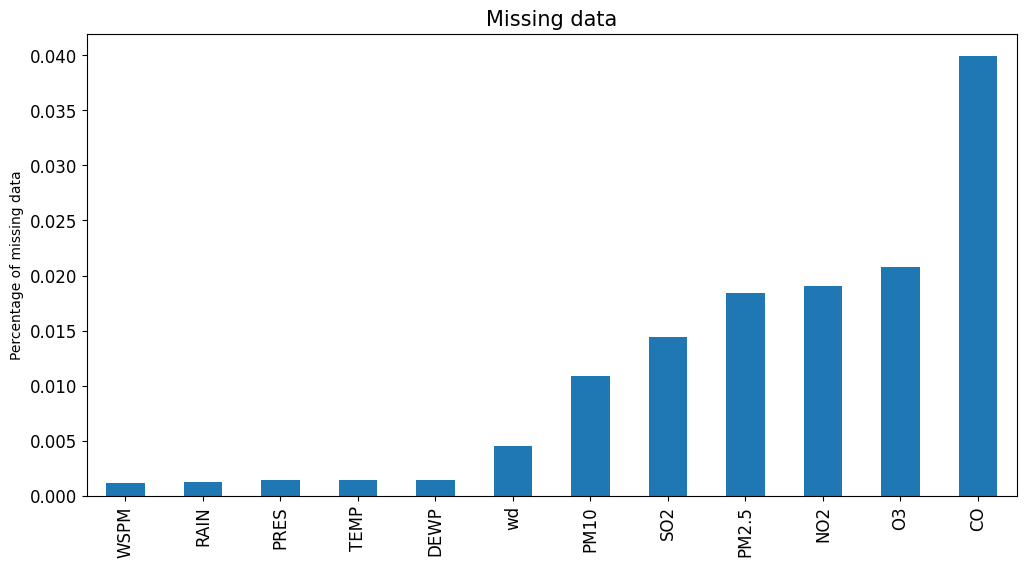

In [86]:
missing_data = airdata_Gucheng_df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(inplace=True)
missing_data = missing_data / len(airdata_Gucheng_df)
missing_data.plot(kind='bar', figsize=(12, 6), fontsize=12)
plt.title('Missing data', fontsize=15)
plt.ylabel('Percentage of missing data')

To address missing values, particularly in time series data, we can apply interpolation with the time method. This technique takes into account the time intervals between data points and fills the missing values accordingly, ensuring a smooth and accurate representation of the temporal trends in the dataset.

In [87]:
# airdata_Gucheng_df.fillna(method='ffill', inplace=True)
airdata_Gucheng_df.interpolate(method='time', inplace=True)
airdata_Gucheng_df.isnull().sum()

C:\Users\dprih\AppData\Local\Temp\ipykernel_5232\686913789.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  airdata_Gucheng_df.interpolate(method='time', inplace=True)


No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2         20
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         159
WSPM         0
station      0
dtype: int64

After applying interpolation to fill missing values in the dataset, it's noted that the columns for NO2 and wd still contain missing values. While these gaps are not extensive, they do contain valuable data. To handle this, I'll fill the ``missing values in the NO2 column with the mean value``, ensuring that the integrity of the data is maintained. Additionally, for`` the wd column, I'll use forward filling to propagate the last observed value forward to fill the missing entries``, ensuring continuity in the wind direction data.

In [88]:
# Seems like the wd and NO2 are still having missing data, since they still have valueable data, we will fill NO2 with mean and wd with ffill
airdata_Gucheng_df['NO2'].fillna(airdata_Gucheng_df['NO2'].mean(), inplace=True)
airdata_Gucheng_df['wd'].fillna(method='ffill', inplace=True)

airdata_Gucheng_df.isnull().sum()

C:\Users\dprih\AppData\Local\Temp\ipykernel_5232\1235773096.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airdata_Gucheng_df['NO2'].fillna(airdata_Gucheng_df['NO2'].mean(), inplace=True)
C:\Users\dprih\AppData\Local\Temp\ipykernel_5232\1235773096.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [89]:
airdata_Gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.074802,119.261567,15.705821,55.851320,1338.100060,58.000001,13.855824,1008.835693,2.600351,0.064374,1.343667
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.994634,97.533240,23.282583,36.502551,1214.044983,57.171816,11.294955,10.104302,13.790109,0.838142,1.151055
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-9.000000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,100.000000,7.000000,50.000000,985.714286,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,167.000000,20.000000,79.000000,1680.652174,84.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


In [90]:
airdata_Gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,6.0,18.0,5.0,55.85132,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
2013-03-01 01:00:00,2,2013,3,1,1,6.0,15.0,5.0,55.85132,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2013-03-01 02:00:00,3,2013,3,1,2,5.0,18.0,5.5,55.85132,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
2013-03-01 03:00:00,4,2013,3,1,3,6.0,20.0,6.0,55.85132,650.0,62.5,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
2013-03-01 04:00:00,5,2013,3,1,4,5.0,17.0,5.0,55.85132,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


Great! With the dataset now cleaned and prepared, we're ready to dive into the analysis. By addressing missing values and transforming the time-related columns into a unified datetime format, we've established a solid foundation for our data exploration. This structured approach will facilitate a more coherent and insightful analysis of the dataset.

In [119]:
# Make a copy of cleaned data into CSV
airdata_Gucheng_df.to_csv('./dashboard/main_data.csv')

## Exploratory Data Analysis (EDA)

### Explore ...

For the initial analysis, I'll explore the distribution of PM2.5 and PM10 levels throughout the year, focusing on key statistical measures such as ``maximum, minimum, and mean values``. This exploration will provide insights into the overall trends and variability in air pollution levels over time.

### PM 2.5 and PM 10 Levels Throughout the Year

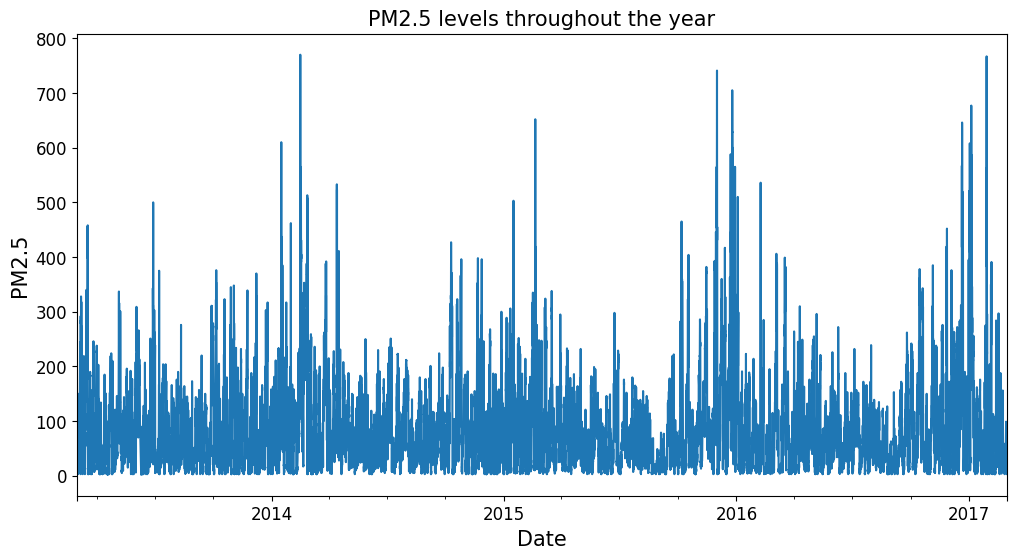

2013 PM2.5 Statistics:
  - Highest:   500.00 (Date: 2013-06-28 20:00:00)
  - Lowest:    2.00 (Date: 2013-04-18 05:00:00)
  - Average:   81.50
  - Total Data Above Average: 2960
  - Total Data Below Average: 4384


2014 PM2.5 Statistics:
  - Highest:   770.00 (Date: 2014-02-14 22:00:00)
  - Lowest:    3.00 (Date: 2014-01-02 10:00:00)
  - Average:   90.55
  - Total Data Above Average: 3366
  - Total Data Below Average: 5394


2015 PM2.5 Statistics:
  - Highest:   741.00 (Date: 2015-12-01 13:00:00)
  - Lowest:    3.00 (Date: 2015-01-01 03:00:00)
  - Average:   83.69
  - Total Data Above Average: 3153
  - Total Data Below Average: 5607


2016 PM2.5 Statistics:
  - Highest:   646.00 (Date: 2016-12-20 14:00:00)
  - Lowest:    3.00 (Date: 2016-01-07 04:00:00)
  - Average:   77.44
  - Total Data Above Average: 3244
  - Total Data Below Average: 5540


2017 PM2.5 Statistics:
  - Highest:   767.00 (Date: 2017-01-28 02:00:00)
  - Lowest:    3.00 (Date: 2017-01-10 03:00:00)
  - Average:   100.97
 

In [91]:
# PM2.5
airdata_Gucheng_df['PM2.5'].plot(kind='line', figsize=(12, 6), fontsize=12)
plt.title('PM2.5 levels throughout the year', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('PM2.5', fontsize=15)
plt.show()

def print_pm25_stats(year):
    yearly_data = airdata_Gucheng_df.groupby(airdata_Gucheng_df.index.year)
    year_data = yearly_data.get_group(year)
    max_pm25_date = year_data['PM2.5'].idxmax().strftime('%Y-%m-%d %H:%M:%S')
    min_pm25_date = year_data['PM2.5'].idxmin().strftime('%Y-%m-%d %H:%M:%S')
    
    print(f'{year} PM2.5 Statistics:')
    print(f'  - Highest:   {year_data["PM2.5"].max():.2f} (Date: {max_pm25_date})')
    print(f'  - Lowest:    {year_data["PM2.5"].min():.2f} (Date: {min_pm25_date})')
    print(f'  - Average:   {year_data["PM2.5"].mean():.2f}')
    
    # Calculate the number of data points above and below average
    above_average = year_data[year_data['PM2.5'] > year_data['PM2.5'].mean()].shape[0]
    below_average = year_data[year_data['PM2.5'] < year_data['PM2.5'].mean()].shape[0]
    
    print(f'  - Total Data Above Average: {above_average}')
    print(f'  - Total Data Below Average: {below_average}')

years_to_analyze = [2013, 2014, 2015, 2016, 2017]
for year in years_to_analyze:
    print_pm25_stats(year)
    print("\n")

Here's the insight where the extreme PM2.5 levels occurred:


1. **Trends Over the Years**:
   - The average PM2.5 levels fluctuated across the years, indicating variability in air quality over time. There isn't a clear upward or downward trend evident from the averages alone.
   - However, there are fluctuations in the highest and lowest values, suggesting varying degrees of pollution levels across different years.

2. **Highest and Lowest Levels**:
   - The highest PM2.5 levels were recorded in 2014 (770.00), closely followed by 2017 (767.00), indicating potentially hazardous levels of pollution during those years.
   - Conversely, the lowest levels were consistently around 3.00 throughout the years, indicating relatively clean air during those specific time points.

3. **Data Distribution Relative to the Average**:
   - For most years, there were more data points below the average PM2.5 level than above it, suggesting that, on average, air quality tended to be below the mean level.
   - However, the number of data points above the average varied across years, indicating fluctuations in pollution levels above the average.

4. **Comparison with Safety Thresholds**:
   - PM2.5 levels as low as 3.00 indicate periods where air quality fell within safe limits. However, the high maximum values in certain years suggest periods of potentially hazardous pollution, which can have adverse health effects.

5. **Yearly Averages**:
   - The yearly averages ranged from 77.44 to 100.97, with 2017 having the highest average PM2.5 levels. This indicates that, on average, air quality was worse in 2017 compared to other years within the dataset. It's important to note that while the average PM2.5 and PM10 levels may appear highest in February, this observation could be influenced by the limited data available for that specific month compared to the entire year. To ensure a more accurate representation of air pollution trends, it's crucial to consider the entirety of the dataset rather than focusing solely on individual months. This broader perspective will provide a more comprehensive understanding of the overall distribution and patterns of PM2.5 and PM10 levels throughout the year.

6. **Context**:
   - The data span from March 2013 to February 2017, providing insights into PM2.5 levels over a four-year period.
   - Understanding the context of the data is crucial for assessing temporal trends and potential factors influencing PM2.5 levels during that time frame.


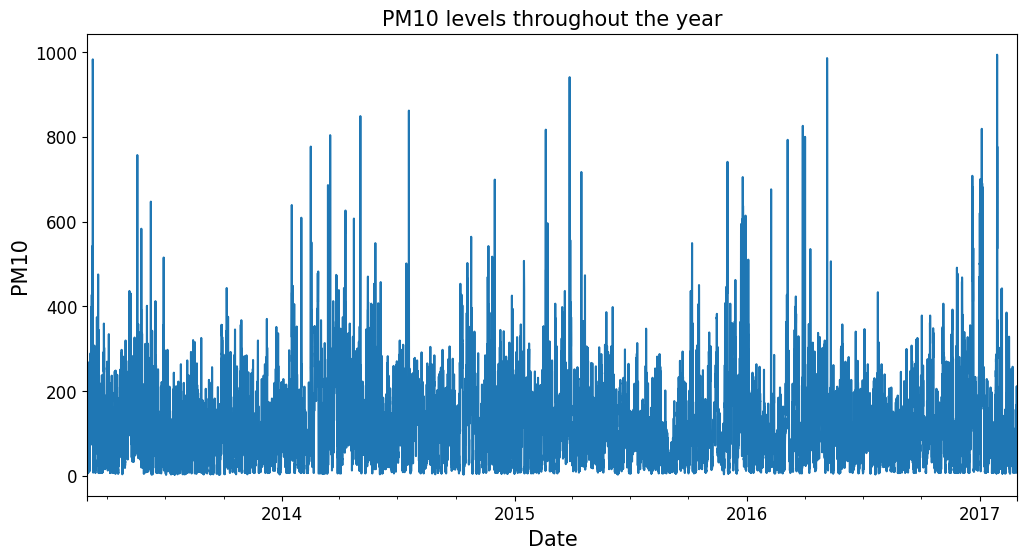

2013 PM10 Statistics:
  - Highest:   983.00 (Date: 2013-03-09 11:00:00)
  - Lowest:    2.00 (Date: 2013-06-09 23:00:00)
  - Average:   112.56
  - Above Average: 3196
  - Below Average: 4148


2014 PM10 Statistics:
  - Highest:   862.00 (Date: 2014-07-19 01:00:00)
  - Lowest:    3.00 (Date: 2014-06-03 11:00:00)
  - Average:   134.78
  - Above Average: 3887
  - Below Average: 4873


2015 PM10 Statistics:
  - Highest:   941.00 (Date: 2015-03-28 13:00:00)
  - Lowest:    3.00 (Date: 2015-06-11 16:00:00)
  - Average:   116.37
  - Above Average: 3580
  - Below Average: 5180


2016 PM10 Statistics:
  - Highest:   986.00 (Date: 2016-05-06 00:00:00)
  - Lowest:    3.00 (Date: 2016-07-20 14:00:00)
  - Average:   111.12
  - Above Average: 3597
  - Below Average: 5187


2017 PM10 Statistics:
  - Highest:   994.00 (Date: 2017-01-28 02:00:00)
  - Lowest:    5.00 (Date: 2017-01-27 02:00:00)
  - Average:   126.44
  - Above Average: 523
  - Below Average: 893




In [92]:
#PM10
airdata_Gucheng_df['PM10'].plot(kind='line', figsize=(12, 6), fontsize=12)
plt.title('PM10 levels throughout the year', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('PM10', fontsize=15)
plt.show()

def print_pm10_stats(year):
    yearly_data = airdata_Gucheng_df.groupby(airdata_Gucheng_df.index.year)
    year_data = yearly_data.get_group(year)
    max_pm10_date = year_data['PM10'].idxmax().strftime('%Y-%m-%d %H:%M:%S')
    min_pm10_date = year_data['PM10'].idxmin().strftime('%Y-%m-%d %H:%M:%S')
    
    print(f'{year} PM10 Statistics:')
    print(f'  - Highest:   {year_data["PM10"].max():.2f} (Date: {max_pm10_date})')
    print(f'  - Lowest:    {year_data["PM10"].min():.2f} (Date: {min_pm10_date})')
    print(f'  - Average:   {year_data["PM10"].mean():.2f}')

    # Calculate the number of data points above and below average
    above_average = year_data[year_data['PM10'] > year_data['PM10'].mean()].shape[0]
    below_average = year_data[year_data['PM10'] < year_data['PM10'].mean()].shape[0]
    
    print(f'  - Above Average: {above_average}')
    print(f'  - Below Average: {below_average}')

years_to_analyze = [2013, 2014, 2015, 2016, 2017]
for year in years_to_analyze:
    print_pm10_stats(year)
    print("\n")

Here's an analysis of the PM10 statistics provided:

1. **Trends Over the Years**:
   - The average PM10 levels fluctuated across the years, showing variability in air quality over time.
   - There isn't a clear upward or downward trend evident from the averages alone, but fluctuations in the highest and lowest values suggest varying pollution levels across different years.

2. **Highest and Lowest Levels**:
   - The highest PM10 levels were recorded in 2016 and 2017, both reaching close to 1000.00 micrograms per cubic meter. These levels are significantly high and indicate potentially hazardous pollution during those periods.
   - The lowest levels were consistently around 3.00, indicating periods of relatively clean air during specific time points across all years.

3. **Data Distribution Relative to the Average**:
   - For most years, there were more data points below the average PM10 level than above it, suggesting that, on average, air quality tended to be below the mean level.
   - However, the number of data points above the average varied across years, indicating fluctuations in pollution levels above the average.

4. **Comparison with Safety Thresholds**:
   - PM10 levels as low as 3.00 indicate periods where air quality fell within safe limits. However, the high maximum values, particularly in 2016 and 2017, suggest periods of potentially hazardous pollution, which can have adverse health effects.

5. **Yearly Averages**:
   - The yearly averages ranged from 111.12 to 134.78. The highest average was observed in 2014, while the lowest was in 2016.
   - 2014 had the highest average PM10 levels, while 2016 had the lowest. 2017 showed an intermediate average level compared to the other years. Similarly, it's worth highlighting that the observed average for PM2.5 levels in February may not accurately reflect the overall trend for the entire year, as the data for February only encompasses a portion of the year. This limited timeframe can potentially skew the average, emphasizing the importance of considering the entire dataset to draw more reliable conclusions about air pollution levels throughout the year.

6. **Context**:
   - The data span from 2013 to 2017, providing insights into PM10 levels over a five-year period.
   - Understanding the context of the data is crucial for assessing temporal trends and potential factors influencing PM10 levels during that time frame.


### SO2, NO2, CO, and O3 Distribution

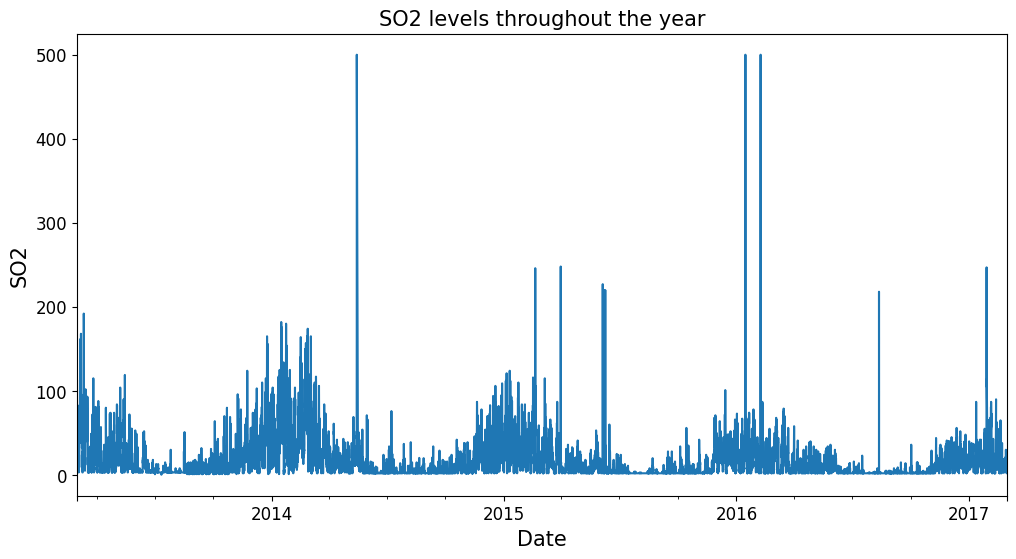

2013 SO2 Statistics:
  - Highest:   192.00 (Date: 2013-03-11 18:00:00)
  - Lowest:    0.29 (Date: 2013-07-11 18:00:00)
  - Average:   17.51
  - Total Data Above Average: 2269
  - Total Data Below Average: 5075


2014 SO2 Statistics:
  - Highest:   500.00 (Date: 2014-05-14 16:00:00)
  - Lowest:    1.00 (Date: 2014-01-12 14:00:00)
  - Average:   21.29
  - Total Data Above Average: 2606
  - Total Data Below Average: 6154


2015 SO2 Statistics:
  - Highest:   248.00 (Date: 2015-03-31 01:00:00)
  - Lowest:    2.00 (Date: 2015-01-05 17:00:00)
  - Average:   13.34
  - Total Data Above Average: 2682
  - Total Data Below Average: 6078


2016 SO2 Statistics:
  - Highest:   500.00 (Date: 2016-01-15 04:00:00)
  - Lowest:    2.00 (Date: 2016-01-07 04:00:00)
  - Average:   10.20
  - Total Data Above Average: 2679
  - Total Data Below Average: 6105


2017 SO2 Statistics:
  - Highest:   247.00 (Date: 2017-01-28 01:00:00)
  - Lowest:    2.00 (Date: 2017-01-10 03:00:00)
  - Average:   20.59
  - Total Da

In [93]:
# SO2 
airdata_Gucheng_df['SO2'].plot(kind='line', figsize=(12, 6), fontsize=12)
plt.title('SO2 levels throughout the year', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('SO2', fontsize=15)
plt.show()

# Explore SO2
def print_so2_stats(year):
    yearly_data = airdata_Gucheng_df.groupby(airdata_Gucheng_df.index.year)
    year_data = yearly_data.get_group(year)
    max_so2_date = year_data['SO2'].idxmax().strftime('%Y-%m-%d %H:%M:%S')
    min_so2_date = year_data['SO2'].idxmin().strftime('%Y-%m-%d %H:%M:%S')
    
    print(f'{year} SO2 Statistics:')
    print(f'  - Highest:   {year_data["SO2"].max():.2f} (Date: {max_so2_date})')
    print(f'  - Lowest:    {year_data["SO2"].min():.2f} (Date: {min_so2_date})')
    print(f'  - Average:   {year_data["SO2"].mean():.2f}')

    # Calculate the number of data points above and below average
    above_average = year_data[year_data['SO2'] > year_data['SO2'].mean()].shape[0]
    below_average = year_data[year_data['SO2'] < year_data['SO2'].mean()].shape[0]

    print(f'  - Total Data Above Average: {above_average}')
    print(f'  - Total Data Below Average: {below_average}')

years_to_analyze = [2013, 2014, 2015, 2016, 2017]
for year in years_to_analyze:
    print_so2_stats(year)
    print("\n")

Here's the analysis of the SO2 (Sulfur Dioxide) statistics provided:

1. **Trends Over the Years**:
   - The average SO2 levels varied across the years, indicating fluctuating levels of sulfur dioxide emissions over time.
   - There isn't a clear upward or downward trend evident from the averages alone, but fluctuations in the highest and lowest values suggest varying pollution levels across different years.

2. **Highest and Lowest Levels**:
   - The highest SO2 levels were recorded in 2014 and 2016, reaching 500.00 micrograms per cubic meter. These levels are notably high and indicate potentially hazardous pollution during those periods.
   - The lowest levels were consistently around 2.00, indicating periods of relatively low sulfur dioxide emissions during specific time points across all years.

3. **Data Distribution Relative to the Average**:
   - For most years, there were more data points below the average SO2 level than above it, suggesting that, on average, sulfur dioxide emissions tended to be below the mean level.
   - However, the number of data points above the average varied across years, indicating fluctuations in pollution levels above the average.

4. **Comparison with Safety Thresholds**:
   - SO2 levels as low as 2.00 indicate periods where emissions fell within safe limits. However, the high maximum values, particularly in 2014 and 2016, suggest periods of potentially hazardous pollution, which can have adverse health effects.

5. **Yearly Averages**:
   - The yearly averages ranged from 10.20 to 21.29. The highest average was observed in 2014, while the lowest was in 2016.
   - 2014 had the highest average SO2 levels, while 2016 had the lowest. 2017 showed an intermediate average level compared to the other years. It's crucial to bear in mind that the dataset for the year 2017 only spans two months, rendering it less reliable for drawing conclusions about annual trends. Therefore, to ensure the robustness of our analysis, we may consider substituting the partial-year data for 2017 with complete-year data. This adjustment will provide a more comprehensive and accurate representation of air pollution levels throughout the entire year.

6. **Context**:
   - The data span from 2013 to 2017, providing insights into SO2 levels over a five-year period.
   - Understanding the context of the data is crucial for assessing temporal trends and potential factors influencing SO2 levels during that time frame.

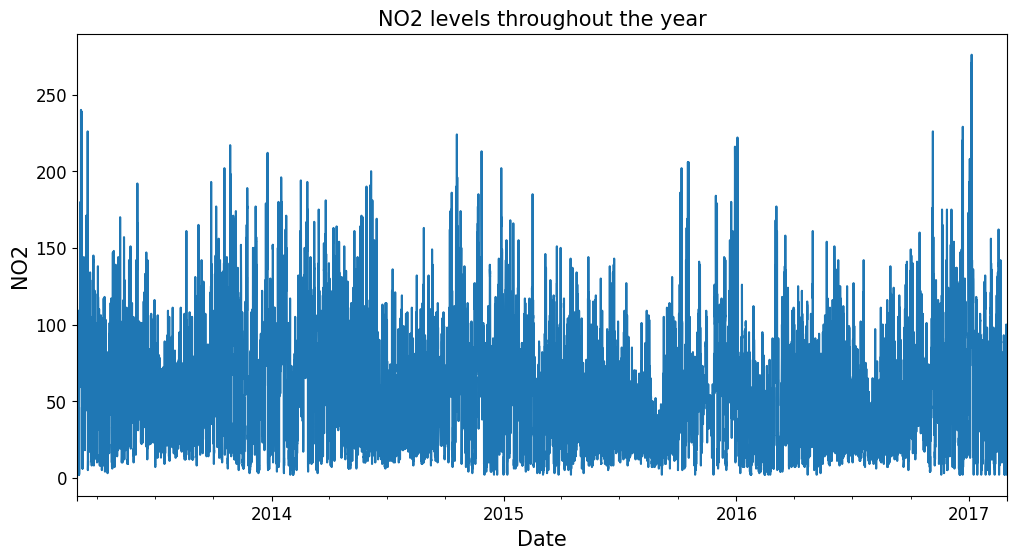

2013 NO2 Statistics:
  - Highest:   240.00 (Date: 2013-03-07 10:00:00)
  - Lowest:    2.00 (Date: 2013-03-04 04:00:00)
  - Average:   61.50
  - Total Data Above Average: 3364
  - Total Data Below Average: 3980


2014 NO2 Statistics:
  - Highest:   224.00 (Date: 2014-10-18 21:00:00)
  - Lowest:    2.00 (Date: 2014-01-30 04:00:00)
  - Average:   62.42
  - Total Data Above Average: 4072
  - Total Data Below Average: 4688


2015 NO2 Statistics:
  - Highest:   216.00 (Date: 2015-12-29 18:00:00)
  - Lowest:    2.00 (Date: 2015-01-06 04:00:00)
  - Average:   49.59
  - Total Data Above Average: 3699
  - Total Data Below Average: 5061


2016 NO2 Statistics:
  - Highest:   229.00 (Date: 2016-12-21 15:00:00)
  - Lowest:    2.00 (Date: 2016-01-23 05:00:00)
  - Average:   49.78
  - Total Data Above Average: 3834
  - Total Data Below Average: 4950


2017 NO2 Statistics:
  - Highest:   276.00 (Date: 2017-01-04 14:00:00)
  - Lowest:    2.00 (Date: 2017-01-07 18:00:00)
  - Average:   62.32
  - Total Da

In [94]:
#NO2
airdata_Gucheng_df['NO2'].plot(kind='line', figsize=(12, 6), fontsize=12)
plt.title('NO2 levels throughout the year', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('NO2', fontsize=15)
plt.show()

# Explore NO2
def print_no2_stats(year):
    yearly_data = airdata_Gucheng_df.groupby(airdata_Gucheng_df.index.year)
    year_data = yearly_data.get_group(year)
    max_no2_date = year_data['NO2'].idxmax().strftime('%Y-%m-%d %H:%M:%S')
    min_no2_date = year_data['NO2'].idxmin().strftime('%Y-%m-%d %H:%M:%S')
    
    print(f'{year} NO2 Statistics:')
    print(f'  - Highest:   {year_data["NO2"].max():.2f} (Date: {max_no2_date})')
    print(f'  - Lowest:    {year_data["NO2"].min():.2f} (Date: {min_no2_date})')
    print(f'  - Average:   {year_data["NO2"].mean():.2f}')

    # Calculate the number of data points above and below average
    above_average = year_data[year_data['NO2'] > year_data['NO2'].mean()].shape[0]
    below_average = year_data[year_data['NO2'] < year_data['NO2'].mean()].shape[0]

    print(f'  - Total Data Above Average: {above_average}')
    print(f'  - Total Data Below Average: {below_average}')

years_to_analyze = [2013, 2014, 2015, 2016, 2017]
for year in years_to_analyze:
    print_no2_stats(year)
    print("\n")

Here's the analysis of the NO2 (Nitrogen Dioxide) statistics provided:

1. **Trends Over the Years**:
   - The average NO2 levels varied across the years, indicating fluctuations in nitrogen dioxide emissions over time.
   - There isn't a clear upward or downward trend evident from the averages alone, but fluctuations in the highest and lowest values suggest varying pollution levels across different years.

2. **Highest and Lowest Levels**:
   - The highest NO2 levels were recorded in 2017, reaching 276.00 micrograms per cubic meter. This level is relatively high compared to other years, indicating potentially hazardous pollution during that period.
   - The lowest levels were consistently around 2.00, indicating periods of relatively low nitrogen dioxide emissions during specific time points across all years.

3. **Data Distribution Relative to the Average**:
   - For most years, there were more data points below the average NO2 level than above it, suggesting that, on average, nitrogen dioxide emissions tended to be below the mean level.
   - However, the number of data points above the average varied across years, indicating fluctuations in pollution levels above the average.

4. **Comparison with Safety Thresholds**:
   - NO2 levels as low as 2.00 indicate periods where emissions fell within safe limits. However, the high maximum values in 2017 suggest a potential for hazardous pollution, which can have adverse health effects.

5. **Yearly Averages**:
   - The yearly averages ranged from 49.59 to 62.42. The highest average was observed in 2014, while the lowest was in 2015.
   - 2014 had the highest average NO2 levels, while 2015 had the lowest. 2017 showed an intermediate average level compared to the other years. Althought 2017 has high average, keep in mind that the data only take 2 months, not the whole year

6. **Context**:
   - The data span from 2013 to 2017, providing insights into NO2 levels over a five-year period.
   - Understanding the context of the data is crucial for assessing temporal trends and potential factors influencing NO2 levels during that time frame.


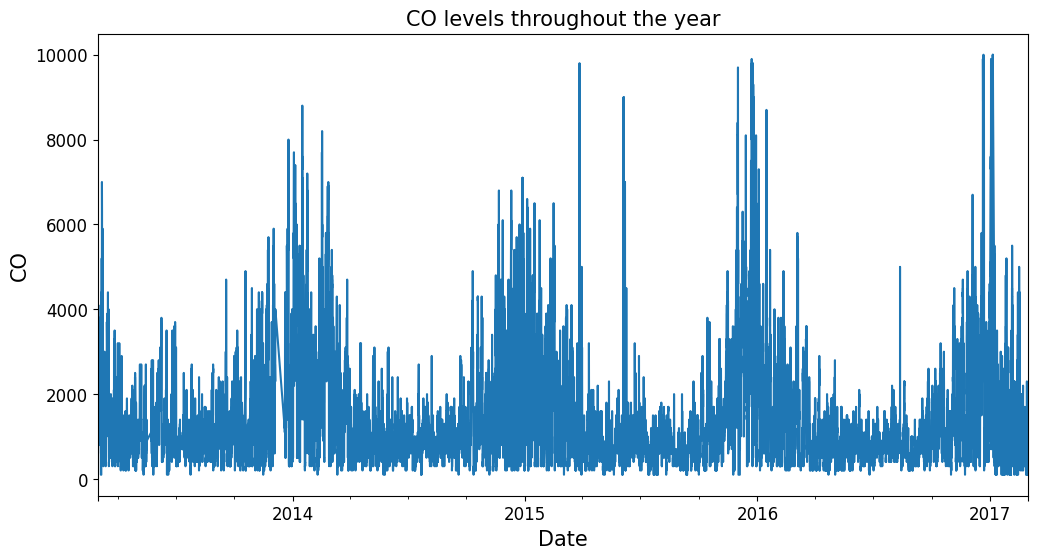

2013 CO Statistics:
  - Highest:   8000.00 (Date: 2013-12-25 09:00:00)
  - Lowest:    100.00 (Date: 2013-03-05 12:00:00)
  - Average:   1341.74
  - Total Data Above Average: 2661
  - Total Data Below Average: 4683


2014 CO Statistics:
  - Highest:   8800.00 (Date: 2014-01-16 03:00:00)
  - Lowest:    100.00 (Date: 2014-02-09 04:00:00)
  - Average:   1442.16
  - Total Data Above Average: 2866
  - Total Data Below Average: 5894


2015 CO Statistics:
  - Highest:   9900.00 (Date: 2015-12-23 00:00:00)
  - Lowest:    100.00 (Date: 2015-03-03 04:00:00)
  - Average:   1323.14
  - Total Data Above Average: 2679
  - Total Data Below Average: 6081


2016 CO Statistics:
  - Highest:   10000.00 (Date: 2016-12-21 04:00:00)
  - Lowest:    100.00 (Date: 2016-04-21 16:00:00)
  - Average:   1170.95
  - Total Data Above Average: 2899
  - Total Data Below Average: 5885


2017 CO Statistics:
  - Highest:   10000.00 (Date: 2017-01-04 19:00:00)
  - Lowest:    100.00 (Date: 2017-01-09 08:00:00)
  - Average: 

In [95]:
#CO
airdata_Gucheng_df['CO'].plot(kind='line', figsize=(12, 6), fontsize=12)
plt.title('CO levels throughout the year', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('CO', fontsize=15)
plt.show()

# Explore CO
def print_co_stats(year):
    yearly_data = airdata_Gucheng_df.groupby(airdata_Gucheng_df.index.year)
    year_data = yearly_data.get_group(year)
    max_co_date = year_data['CO'].idxmax().strftime('%Y-%m-%d %H:%M:%S')
    min_co_date = year_data['CO'].idxmin().strftime('%Y-%m-%d %H:%M:%S')
    
    print(f'{year} CO Statistics:')
    print(f'  - Highest:   {year_data["CO"].max():.2f} (Date: {max_co_date})')
    print(f'  - Lowest:    {year_data["CO"].min():.2f} (Date: {min_co_date})')
    print(f'  - Average:   {year_data["CO"].mean():.2f}')

    # Calculate the number of data points above and below average
    above_average = year_data[year_data['CO'] > year_data['CO'].mean()].shape[0]
    below_average = year_data[year_data['CO'] < year_data['CO'].mean()].shape[0]

    print(f'  - Total Data Above Average: {above_average}')
    print(f'  - Total Data Below Average: {below_average}')

years_to_analyze = [2013, 2014, 2015, 2016, 2017]
for year in years_to_analyze:
    print_co_stats(year)
    print("\n")

Here's the analysis of the CO (Carbon Monoxide) statistics provided:

1. **Trends Over the Years**:
   - The average CO levels fluctuated across the years, indicating variability in carbon monoxide emissions over time.
   - There isn't a clear upward or downward trend evident from the averages alone, but fluctuations in the highest and lowest values suggest varying pollution levels across different years.

2. **Highest and Lowest Levels**:
   - The highest CO levels were consistently very high across all years, reaching the maximum limit of 10000.00 micrograms per cubic meter in 2016 and 2017. These levels are extremely elevated and indicate potentially hazardous pollution during those periods.
   - The lowest levels were consistently around 100.00, indicating periods of relatively low carbon monoxide emissions during specific time points across all years.

3. **Data Distribution Relative to the Average**:
   - For most years, there were more data points below the average CO level than above it, suggesting that, on average, carbon monoxide emissions tended to be below the mean level.
   - However, the number of data points above the average varied across years, indicating fluctuations in pollution levels above the average.

4. **Comparison with Safety Thresholds**:
   - CO levels as low as 100.00 indicate periods where emissions fell within safe limits. However, the consistently high maximum values suggest a potential for hazardous pollution, which can have adverse health effects.

5. **Yearly Averages**:
   - The yearly averages ranged from 1170.95 to 1804.84. The highest average was observed in 2017, while the lowest was in 2016.
   - 2017 had the highest average CO levels, while 2016 had the lowest. Other years showed intermediate average levels compared to these extremes. The apparent high average for 2017 can be attributed to the fact that the dataset only spans two months, rather than the entire year. This partial coverage likely distorts the average, potentially leading to a misrepresentation of air pollution levels for that year. To address this limitation and ensure the accuracy of our analysis, we may consider replacing the partial-year data for 2017 with data spanning the entire year. This adjustment will provide a more comprehensive and reliable understanding of air pollution trends over time.

6. **Context**:
   - The data span from 2013 to 2017, providing insights into CO levels over a five-year period.
   - Understanding the context of the data is crucial for assessing temporal trends and potential factors influencing CO levels during that time frame.

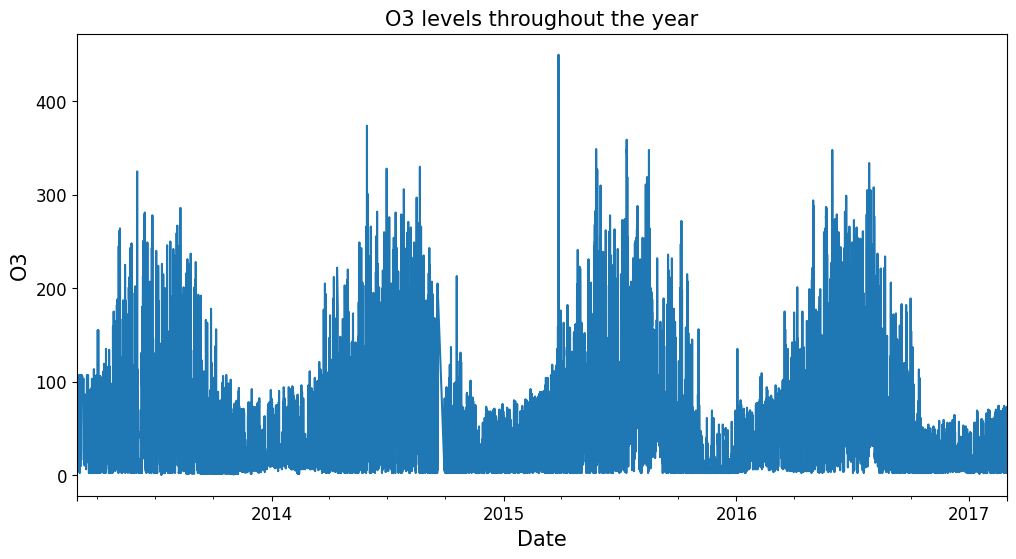

2013 O3 Statistics:
  - Highest:   325.00 (Date: 2013-06-03 16:00:00)
  - Lowest:    0.21 (Date: 2013-07-11 05:00:00)
  - Average:   55.78
  - Total Data Above Average: 3149
  - Total Data Below Average: 4195


2014 O3 Statistics:
  - Highest:   374.00 (Date: 2014-05-30 16:00:00)
  - Lowest:    1.00 (Date: 2014-02-11 03:00:00)
  - Average:   60.25
  - Total Data Above Average: 3601
  - Total Data Below Average: 5159


2015 O3 Statistics:
  - Highest:   450.00 (Date: 2015-03-27 15:00:00)
  - Lowest:    2.00 (Date: 2015-01-02 03:00:00)
  - Average:   60.78
  - Total Data Above Average: 3647
  - Total Data Below Average: 5113


2016 O3 Statistics:
  - Highest:   348.00 (Date: 2016-05-30 15:00:00)
  - Lowest:    2.00 (Date: 2016-01-01 02:00:00)
  - Average:   59.52
  - Total Data Above Average: 3597
  - Total Data Below Average: 5187


2017 O3 Statistics:
  - Highest:   74.00 (Date: 2017-02-15 17:00:00)
  - Lowest:    1.00 (Date: 2017-01-16 20:00:00)
  - Average:   28.92
  - Total Data Abo

In [96]:
# O3
airdata_Gucheng_df['O3'].plot(kind='line', figsize=(12, 6), fontsize=12)
plt.title('O3 levels throughout the year', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('O3', fontsize=15)
plt.show()

# Explore O3
def print_o3_stats(year):
    yearly_data = airdata_Gucheng_df.groupby(airdata_Gucheng_df.index.year)
    year_data = yearly_data.get_group(year)
    max_o3_date = year_data['O3'].idxmax().strftime('%Y-%m-%d %H:%M:%S')
    min_o3_date = year_data['O3'].idxmin().strftime('%Y-%m-%d %H:%M:%S')
    
    print(f'{year} O3 Statistics:')
    print(f'  - Highest:   {year_data["O3"].max():.2f} (Date: {max_o3_date})')
    print(f'  - Lowest:    {year_data["O3"].min():.2f} (Date: {min_o3_date})')
    print(f'  - Average:   {year_data["O3"].mean():.2f}')

    # Calculate the number of data points above and below average
    above_average = year_data[year_data['O3'] > year_data['O3'].mean()].shape[0]
    below_average = year_data[year_data['O3'] < year_data['O3'].mean()].shape[0]

    print(f'  - Total Data Above Average: {above_average}')
    print(f'  - Total Data Below Average: {below_average}')

years_to_analyze = [2013, 2014, 2015, 2016, 2017]
for year in years_to_analyze:
    print_o3_stats(year)
    print("\n")

Here's the analysis for the O3 (Ozone) statistics provided:

1. **Yearly Fluctuations**:
   - Ozone levels varied across the years, showing fluctuations in atmospheric ozone concentrations.
   - There is no clear consistent trend over the years, but each year exhibits varying levels of ozone pollution.

2. **Extreme Values**:
   - In 2015, the highest ozone level was recorded, reaching 450.00 micrograms per cubic meter, indicating a period of potentially high ozone pollution.
   - Conversely, the lowest levels were consistently around 1.00 to 2.00 micrograms per cubic meter, indicating periods of relatively low ozone concentrations.

3. **Data Distribution**:
   - In most years, there were more data points above the average ozone level than below it, suggesting that ozone concentrations tended to be above the mean level on average.
   - However, the number of data points below the average varied across years, indicating fluctuations in pollution levels below the average.

4. **Safety Considerations**:
   - While ozone levels as low as 1.00 micrograms per cubic meter indicate periods within safe limits, the high maximum values, particularly in 2015, suggest potential periods of elevated ozone pollution, which can have adverse health effects.

5. **Average Levels**:
   - Average ozone levels ranged from 28.92 to 60.78 micrograms per cubic meter across the years.
   - The highest average was observed in 2015, indicating overall higher ozone concentrations compared to other years.

6. **Contextual Understanding**:
   - These statistics span from 2013 to 2017, providing insights into ozone levels over a five-year period.
   - Understanding the context of the data helps assess temporal trends and potential factors influencing ozone levels during that time frame.

### TEMP, PRES, DEWP, RAIN, and WSPM

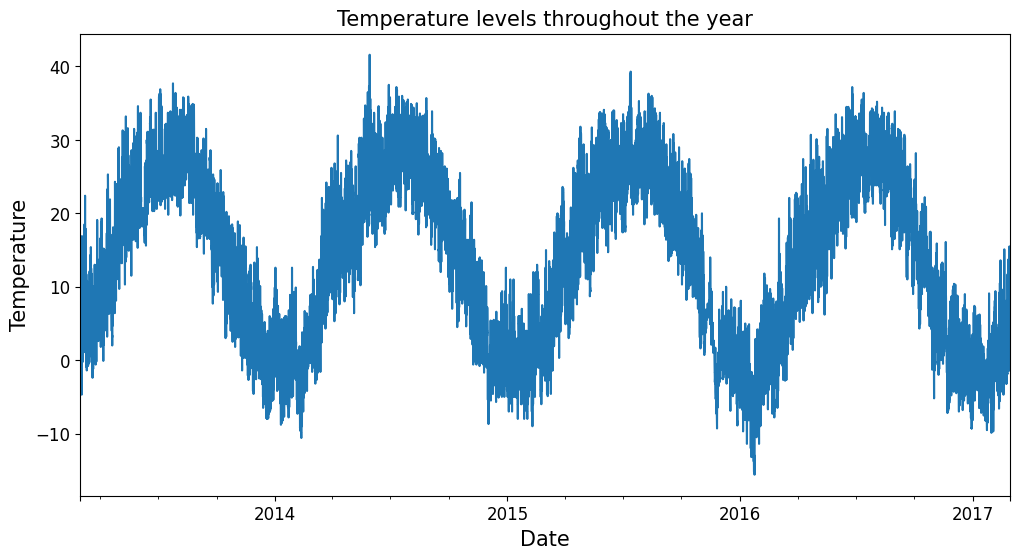

2013 Temperature Statistics:
  - Highest:   37.70 (Date: 2013-07-24 15:00:00)
  - Lowest:    -8.00 (Date: 2013-12-19 06:00:00)
  - Average:   15.93
  - Total Data Above Average: 3979
  - Total Data Below Average: 3365


2014 Temperature Statistics:
  - Highest:   41.60 (Date: 2014-05-29 14:00:00)
  - Lowest:    -10.60 (Date: 2014-02-11 05:00:00)
  - Average:   14.43
  - Total Data Above Average: 4638
  - Total Data Below Average: 4122


2015 Temperature Statistics:
  - Highest:   39.30 (Date: 2015-07-13 15:00:00)
  - Lowest:    -9.30 (Date: 2015-11-26 07:00:00)
  - Average:   14.03
  - Total Data Above Average: 4577
  - Total Data Below Average: 4183


2016 Temperature Statistics:
  - Highest:   37.20 (Date: 2016-06-25 16:00:00)
  - Lowest:    -15.60 (Date: 2016-01-24 05:00:00)
  - Average:   13.55
  - Total Data Above Average: 4592
  - Total Data Below Average: 4192


2017 Temperature Statistics:
  - Highest:   15.50 (Date: 2017-02-27 16:00:00)
  - Lowest:    -9.90 (Date: 2017-01-30 0

In [97]:
# Temperature
airdata_Gucheng_df['TEMP'].plot(kind='line', figsize=(12, 6), fontsize=12)

plt.title('Temperature levels throughout the year', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.show()

def print_temp_stats(year):
    yearly_data = airdata_Gucheng_df.groupby(airdata_Gucheng_df.index.year)
    year_data = yearly_data.get_group(year)
    max_temp_date = year_data['TEMP'].idxmax().strftime('%Y-%m-%d %H:%M:%S')
    min_temp_date = year_data['TEMP'].idxmin().strftime('%Y-%m-%d %H:%M:%S')
    
    print(f'{year} Temperature Statistics:')
    print(f'  - Highest:   {year_data["TEMP"].max():.2f} (Date: {max_temp_date})')
    print(f'  - Lowest:    {year_data["TEMP"].min():.2f} (Date: {min_temp_date})')
    print(f'  - Average:   {year_data["TEMP"].mean():.2f}')

    # Calculate the number of data points above and below average
    above_average = year_data[year_data['TEMP'] > year_data['TEMP'].mean()].shape[0]
    below_average = year_data[year_data['TEMP'] < year_data['TEMP'].mean()].shape[0]

    print(f'  - Total Data Above Average: {above_average}')
    print(f'  - Total Data Below Average: {below_average}')

years_to_analyze = [2013, 2014, 2015, 2016, 2017]
for year in years_to_analyze:
    print_temp_stats(year)
    print("\n")

Here's a the analysis of the temperature statistics provided:

1. **Temperature Extremes**:
   - Across the years 2013 to 2017, the highest temperature was 41.60°C in 2014, while the lowest was -15.60°C in 2016.
   - Notably, 2014 had the highest peak temperature, and 2016 experienced the lowest extreme.

2. **Average Temperature**:
   - The average temperature ranged from 0.37°C in 2017 to 15.93°C in 2013.
   - Each year exhibited its own characteristic average temperature level.

3. **Data Distribution**:
   - The majority of data points fell above the average temperature in each year, except for 2017 where data below average temperature was slightly higher.
   - This distribution indicates a tendency for temperatures to be predominantly above the yearly average.

4. **Total Data Points**:
   - 2014 had the highest total data points above average temperature, with 4638 data points, while 2017 had the lowest with 626 data points.
   - Conversely, 2017 had the highest total data points below average temperature, with 790 data points, indicating a relatively cooler year.

5. **Significance of Extremes**:
   - Extreme temperature events, both high and low, can have significant impacts on various sectors, including agriculture, health, and infrastructure.
   - Monitoring and understanding temperature extremes are essential for preparedness and adaptation to climate variability.

6. **Contextual Insight**:
   - These statistics span five years, providing a snapshot of temperature variations over time.
   - Understanding these fluctuations helps in assessing climate patterns and their implications for different regions and sectors.
   - 2017 Data is only for 2 months, so it's not reliable to draw conclusion about the whole year

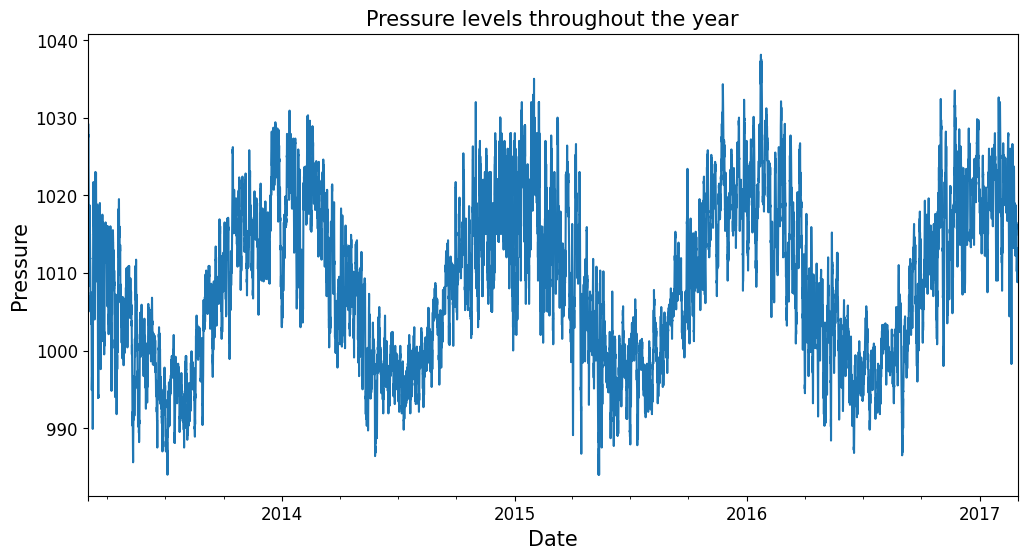

2013 Pressure Statistics:
  - Highest:   1029.40 (Date: 2013-12-21 02:00:00)
  - Lowest:    984.00 (Date: 2013-07-04 15:00:00)
  - Average:   1006.10
  - Total Data Above Average: 3637
  - Total Data Below Average: 3707


2014 Pressure Statistics:
  - Highest:   1032.00 (Date: 2014-10-31 22:00:00)
  - Lowest:    986.40 (Date: 2014-05-26 17:00:00)
  - Average:   1008.88
  - Total Data Above Average: 4335
  - Total Data Below Average: 4425


2015 Pressure Statistics:
  - Highest:   1035.00 (Date: 2015-01-31 10:00:00)
  - Lowest:    984.00 (Date: 2015-05-12 17:00:00)
  - Average:   1009.16
  - Total Data Above Average: 4229
  - Total Data Below Average: 4531


2016 Pressure Statistics:
  - Highest:   1038.10 (Date: 2016-01-22 20:00:00)
  - Lowest:    986.50 (Date: 2016-08-31 16:00:00)
  - Average:   1009.15
  - Total Data Above Average: 4196
  - Total Data Below Average: 4588


2017 Pressure Statistics:
  - Highest:   1032.60 (Date: 2017-01-30 09:00:00)
  - Lowest:    998.30 (Date: 2017-0

In [98]:
# Pressure
airdata_Gucheng_df['PRES'].plot(kind='line', figsize=(12, 6), fontsize=12)
plt.title('Pressure levels throughout the year', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Pressure', fontsize=15)
plt.show()
# Explore Pressure
def print_pres_stats(year):
    yearly_data = airdata_Gucheng_df.groupby(airdata_Gucheng_df.index.year)
    year_data = yearly_data.get_group(year)
    max_pres_date = year_data['PRES'].idxmax().strftime('%Y-%m-%d %H:%M:%S')
    min_pres_date = year_data['PRES'].idxmin().strftime('%Y-%m-%d %H:%M:%S')
    
    print(f'{year} Pressure Statistics:')
    print(f'  - Highest:   {year_data["PRES"].max():.2f} (Date: {max_pres_date})')
    print(f'  - Lowest:    {year_data["PRES"].min():.2f} (Date: {min_pres_date})')
    print(f'  - Average:   {year_data["PRES"].mean():.2f}')

    # Calculate the number of data points above and below average
    above_average = year_data[year_data['PRES'] > year_data['PRES'].mean()].shape[0]
    below_average = year_data[year_data['PRES'] < year_data['PRES'].mean()].shape[0]

    print(f'  - Total Data Above Average: {above_average}')
    print(f'  - Total Data Below Average: {below_average}')

years_to_analyze = [2013, 2014, 2015, 2016, 2017]
for year in years_to_analyze:
    print_pres_stats(year)
    print("\n")

Here's the analysis of the pressure statistics provided:

1. **Pressure Range Across the Years**:
   - The highest pressure was recorded in 2016, peaking at 1038.10 millibars, while the lowest was in 2013 at 984.00 millibars.
   - Each year exhibited its own range of pressure values, with some years experiencing higher extremes compared to others.

2. **Average Pressure**:
   - The average pressure ranged from 1006.10 millibars in 2013 to 1018.82 millibars in 2017.
   - Each year had its own characteristic average pressure level, indicating variations in atmospheric pressure over time.

3. **Data Distribution Relative to Average**:
   - For most years, the number of data points above the average pressure exceeded those below it, suggesting a tendency for pressure to be above the yearly average.
   - However, the distribution varied slightly each year, indicating fluctuations in pressure patterns.

4. **Total Data Points**:
   - The total data points above average pressure ranged from 3637 in 2013 to 4335 in 2014, while the total data points below average pressure varied from 3707 in 2013 to 683 in 2017.
   - These variations highlight differences in pressure conditions across the years.

5. **Significance of Pressure Extremes**:
   - Extreme pressure events can influence weather patterns and affect various activities such as agriculture, aviation, and outdoor events.
   - Understanding pressure extremes is essential for predicting weather phenomena and mitigating associated risks.

6. **Contextual Insight**:
   - These statistics span five years, providing insight into pressure variations over time.
   - Understanding these fluctuations is important for weather forecasting and climate analysis.


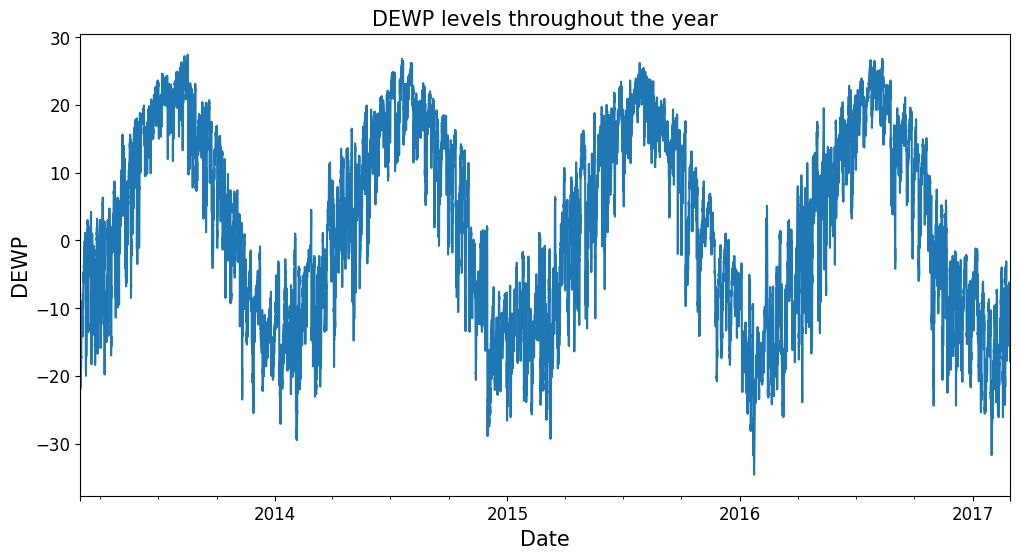

2013 DEWP Statistics:
  - Highest:   27.40 (Date: 2013-08-16 16:00:00)
  - Lowest:    -25.50 (Date: 2013-11-28 01:00:00)
  - Average:   5.48
  - Total Data Above Average: 3765
  - Total Data Below Average: 3579


2014 DEWP Statistics:
  - Highest:   26.80 (Date: 2014-07-19 09:00:00)
  - Lowest:    -29.50 (Date: 2014-02-04 03:00:00)
  - Average:   2.94
  - Total Data Above Average: 4478
  - Total Data Below Average: 4282


2015 DEWP Statistics:
  - Highest:   26.20 (Date: 2015-07-27 19:00:00)
  - Lowest:    -29.30 (Date: 2015-03-09 19:00:00)
  - Average:   3.13
  - Total Data Above Average: 4508
  - Total Data Below Average: 4252


2016 DEWP Statistics:
  - Highest:   26.80 (Date: 2016-08-11 20:00:00)
  - Lowest:    -34.60 (Date: 2016-01-23 12:00:00)
  - Average:   2.02
  - Total Data Above Average: 4548
  - Total Data Below Average: 4236


2017 DEWP Statistics:
  - Highest:   -1.20 (Date: 2017-01-05 12:00:00)
  - Lowest:    -31.70 (Date: 2017-01-30 17:00:00)
  - Average:   -14.12
  - T

In [99]:
# DEWP
airdata_Gucheng_df['DEWP'].plot(kind='line', figsize=(12, 6), fontsize=12)
plt.title('DEWP levels throughout the year', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('DEWP', fontsize=15)
plt.show()
# Find the lowest, highest, and average levels of DEWP throughout the year.
def print_dewp_stats(year):
    yearly_data = airdata_Gucheng_df.groupby(airdata_Gucheng_df.index.year)
    year_data = yearly_data.get_group(year)
    max_dewp_date = year_data['DEWP'].idxmax().strftime('%Y-%m-%d %H:%M:%S')
    min_dewp_date = year_data['DEWP'].idxmin().strftime('%Y-%m-%d %H:%M:%S')
    
    print(f'{year} DEWP Statistics:')
    print(f'  - Highest:   {year_data["DEWP"].max():.2f} (Date: {max_dewp_date})')
    print(f'  - Lowest:    {year_data["DEWP"].min():.2f} (Date: {min_dewp_date})')
    print(f'  - Average:   {year_data["DEWP"].mean():.2f}')

    # Calculate the number of data points above and below average
    above_average = year_data[year_data['DEWP'] > year_data['DEWP'].mean()].shape[0]
    below_average = year_data[year_data['DEWP'] < year_data['DEWP'].mean()].shape[0]

    print(f'  - Total Data Above Average: {above_average}')
    print(f'  - Total Data Below Average: {below_average}')

years_to_analyze = [2013, 2014, 2015, 2016, 2017]
for year in years_to_analyze:
    print_dewp_stats(year)
    print("\n")

Here's the analysis of the DEWP (Dew Point) statistics provided:

1. **Dew Point Range Across the Years**:
   - The highest dew point was recorded in 2013, reaching 27.40°C, while the lowest was in 2016 at -34.60°C.
   - Each year exhibited its own range of dew point values, reflecting variations in atmospheric moisture content.

2. **Average Dew Point**:
   - The average dew point ranged from -14.12°C in 2017 to 5.48°C in 2013.
   - Each year had its own characteristic average dew point level, indicating differences in atmospheric humidity over time.

3. **Data Distribution Relative to Average**:
   - For most years, the number of data points above the average dew point exceeded those below it, suggesting a tendency for dew points to be above the yearly average.
   - However, the distribution varied slightly each year, indicating fluctuations in atmospheric moisture levels.

4. **Total Data Points**:
   - The total data points above average dew point ranged from 3765 in 2013 to 4548 in 2016, while the total data points below average dew point varied from 3579 in 2013 to 670 in 2017.
   - These variations highlight differences in atmospheric moisture conditions across the years.

5. **Significance of Dew Point Extremes**:
   - Extreme dew point values can impact human comfort, agricultural activities, and weather phenomena such as fog formation.
   - Understanding dew point extremes is crucial for assessing moisture-related risks and impacts.

6. **Contextual Insight**:
   - These statistics span five years, providing insight into dew point variations over time.
   - Understanding these fluctuations is important for weather forecasting, climate analysis, and assessing moisture-related risks.

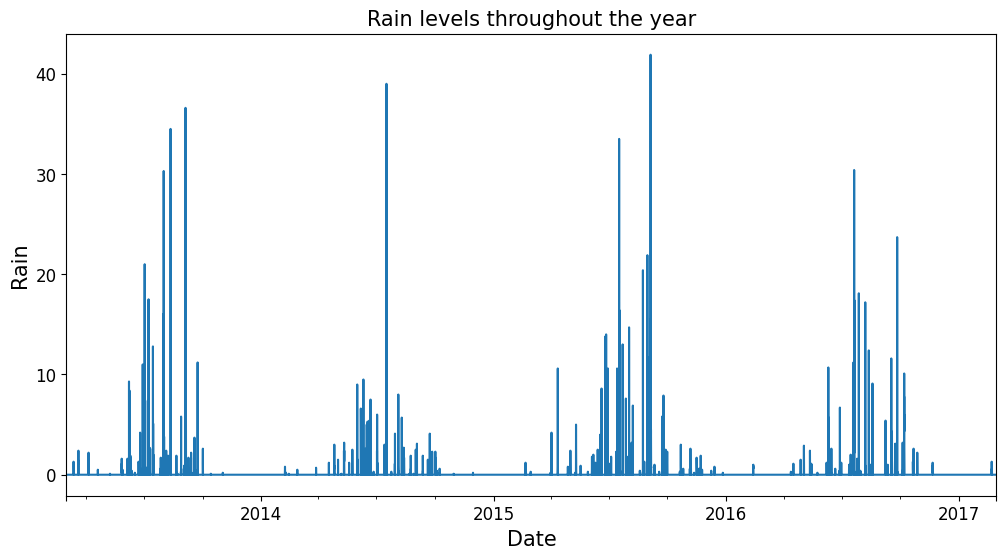

2013 Rain Statistics:
  - Highest:   36.60 (Date: 2013-09-04 03:00:00)
  - Lowest:    0.00 (Date: 2013-03-01 00:00:00)
  - Average:   0.07
  - Total Data Above Average: 294
  - Total Data Below Average: 7050


2014 Rain Statistics:
  - Highest:   39.00 (Date: 2014-07-16 19:00:00)
  - Lowest:    0.00 (Date: 2014-01-01 00:00:00)
  - Average:   0.04
  - Total Data Above Average: 249
  - Total Data Below Average: 8511


2015 Rain Statistics:
  - Highest:   41.90 (Date: 2015-09-04 16:00:00)
  - Lowest:    0.00 (Date: 2015-01-01 00:00:00)
  - Average:   0.08
  - Total Data Above Average: 480
  - Total Data Below Average: 8280


2016 Rain Statistics:
  - Highest:   30.40 (Date: 2016-07-20 12:00:00)
  - Lowest:    0.00 (Date: 2016-01-01 00:00:00)
  - Average:   0.08
  - Total Data Above Average: 316
  - Total Data Below Average: 8468


2017 Rain Statistics:
  - Highest:   1.30 (Date: 2017-02-21 13:00:00)
  - Lowest:    0.00 (Date: 2017-01-01 00:00:00)
  - Average:   0.00
  - Total Data Above A

In [100]:
# Rain
airdata_Gucheng_df['RAIN'].plot(kind='line', figsize=(12, 6), fontsize=12)
plt.title('Rain levels throughout the year', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Rain', fontsize=15)
plt.show()

# Explore Rain
def print_rain_stats(year):
    yearly_data = airdata_Gucheng_df.groupby(airdata_Gucheng_df.index.year)
    year_data = yearly_data.get_group(year)
    max_rain_date = year_data['RAIN'].idxmax().strftime('%Y-%m-%d %H:%M:%S')
    min_rain_date = year_data['RAIN'].idxmin().strftime('%Y-%m-%d %H:%M:%S')
    
    print(f'{year} Rain Statistics:')
    print(f'  - Highest:   {year_data["RAIN"].max():.2f} (Date: {max_rain_date})')
    print(f'  - Lowest:    {year_data["RAIN"].min():.2f} (Date: {min_rain_date})')
    print(f'  - Average:   {year_data["RAIN"].mean():.2f}')

    # Calculate the number of data points above and below average
    above_average = year_data[year_data['RAIN'] > year_data['RAIN'].mean()].shape[0]
    below_average = year_data[year_data['RAIN'] < year_data['RAIN'].mean()].shape[0]

    print(f'  - Total Data Above Average: {above_average}')
    print(f'  - Total Data Below Average: {below_average}')

years_to_analyze = [2013, 2014, 2015, 2016, 2017]
for year in years_to_analyze:
    print_rain_stats(year)
    print("\n")


Here's the analysis of the rain statistics provided:

1. **Rainfall Variability**:
   - Across the years 2013 to 2017, the highest recorded rainfall was 41.90 mm in 2015, while the lowest was 0.00 mm, observed in multiple years.
   - Each year exhibited its own range of rainfall values, with some years experiencing heavier rainfall events compared to others.

2. **Average Rainfall**:
   - The average rainfall ranged from 0.00 mm in 2017 to 0.08 mm in 2015 and 2016.
   - Notably, 2017 had the lowest average rainfall, while 2015 and 2016 had slightly higher averages.

3. **Data Distribution Relative to Average**:
   - For most years, the number of data points below the average rainfall exceeded those above it, indicating a tendency for rainfall to be below the yearly average.
   - However, the distribution varied slightly each year, suggesting fluctuations in rainfall patterns.

4. **Total Data Points**:
   - The total data points above average rainfall ranged from 9 in 2017 to 480 in 2015, while the total data points below average rainfall varied from 7050 in 2013 to 1407 in 2017.
   - These variations highlight differences in rainfall conditions across the years.

5. **Significance of Rainfall Extremes**:
   - Extreme rainfall events can lead to flooding, erosion, and other hazards, while prolonged periods of low rainfall can result in drought conditions.
   - Monitoring rainfall extremes is essential for assessing water resource availability and managing associated risks.

6. **Contextual Insight**:
   - These statistics span five years, providing insight into rainfall variations over time.
   - Understanding these fluctuations is important for water resource management, agriculture, and disaster preparedness.

This analysis emphasizes the importance of monitoring rainfall patterns and understanding their impacts on various sectors and ecosystems.

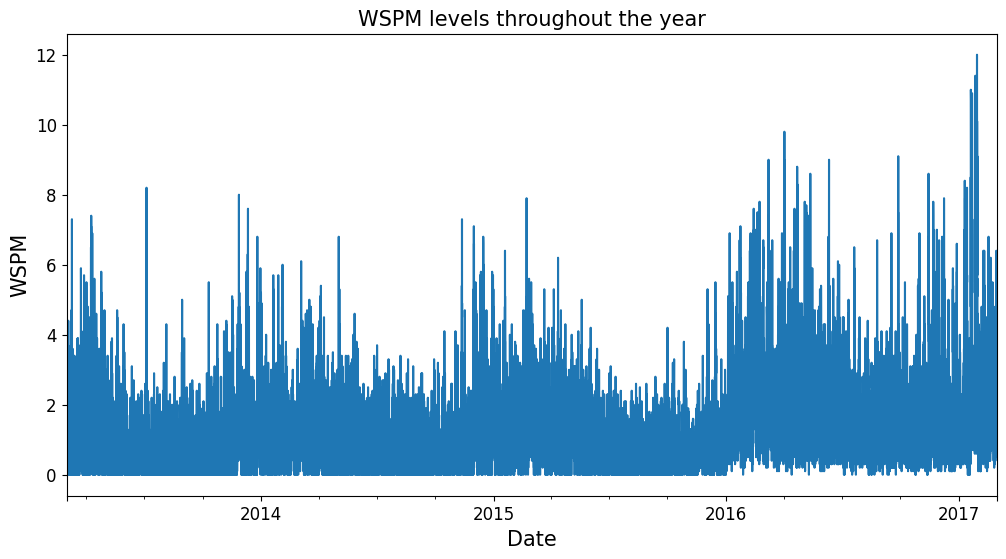

2013 WSPM Statistics:
  - Highest:   8.20 (Date: 2013-07-04 16:00:00)
  - Lowest:    0.00 (Date: 2013-03-02 23:00:00)
  - Average:   1.03
  - Total Data Above Average: 2791
  - Total Data Below Average: 4553


2014 WSPM Statistics:
  - Highest:   7.30 (Date: 2014-11-12 06:00:00)
  - Lowest:    0.00 (Date: 2014-01-02 01:00:00)
  - Average:   1.11
  - Total Data Above Average: 3393
  - Total Data Below Average: 5367


2015 WSPM Statistics:
  - Highest:   7.90 (Date: 2015-02-21 17:00:00)
  - Lowest:    0.00 (Date: 2015-01-02 21:00:00)
  - Average:   1.11
  - Total Data Above Average: 3328
  - Total Data Below Average: 5432


2016 WSPM Statistics:
  - Highest:   9.80 (Date: 2016-04-01 17:00:00)
  - Lowest:    0.00 (Date: 2016-01-27 20:00:00)
  - Average:   1.91
  - Total Data Above Average: 3374
  - Total Data Below Average: 5410


2017 WSPM Statistics:
  - Highest:   12.00 (Date: 2017-01-29 07:00:00)
  - Lowest:    0.00 (Date: 2017-01-14 21:00:00)
  - Average:   2.33
  - Total Data Above 

In [101]:
# WSPM
airdata_Gucheng_df['WSPM'].plot(kind='line', figsize=(12, 6), fontsize=12)
plt.title('WSPM levels throughout the year', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('WSPM', fontsize=15)
plt.show()

# Explore WSPM
def print_wspm_stats(year):
    yearly_data = airdata_Gucheng_df.groupby(airdata_Gucheng_df.index.year)
    year_data = yearly_data.get_group(year)
    max_wspm_date = year_data['WSPM'].idxmax().strftime('%Y-%m-%d %H:%M:%S')
    min_wspm_date = year_data['WSPM'].idxmin().strftime('%Y-%m-%d %H:%M:%S')
    
    print(f'{year} WSPM Statistics:')
    print(f'  - Highest:   {year_data["WSPM"].max():.2f} (Date: {max_wspm_date})')
    print(f'  - Lowest:    {year_data["WSPM"].min():.2f} (Date: {min_wspm_date})')
    print(f'  - Average:   {year_data["WSPM"].mean():.2f}')

    # Calculate the number of data points above and below average
    above_average = year_data[year_data['WSPM'] > year_data['WSPM'].mean()].shape[0]
    below_average = year_data[year_data['WSPM'] < year_data['WSPM'].mean()].shape[0]

    print(f'  - Total Data Above Average: {above_average}')
    print(f'  - Total Data Below Average: {below_average}')

years_to_analyze = [2013, 2014, 2015, 2016, 2017]
for year in years_to_analyze:
    print_wspm_stats(year)
    print("\n")

Here's the analysis of the wind speed (WSPM) statistics provided:

1. **Wind Speed Range Across the Years**:
   - The highest wind speed recorded was 12.00 WSPM in 2017, while the lowest was 0.00 WSPM, observed in all years.
   - Each year exhibited its own range of wind speed values, with some years experiencing stronger wind events compared to others.

2. **Average Wind Speed**:
   - The average wind speed ranged from 1.03 WSPM in 2013 to 2.33 WSPM in 2017.
   - Notably, 2017 had the highest average wind speed, while 2013 had the lowest.

3. **Data Distribution Relative to Average**:
   - For most years, the number of data points above the average wind speed exceeded those below it, indicating a tendency for wind speeds to be above the yearly average.
   - However, the distribution varied slightly each year, suggesting fluctuations in wind speed patterns.

4. **Total Data Points**:
   - The total data points above average wind speed ranged from 2791 in 2013 to 524 in 2017, while the total data points below average wind speed varied from 4553 in 2013 to 892 in 2017.
   - These variations highlight differences in wind speed conditions across the years.

5. **Significance of Wind Speed Extremes**:
   - Extreme wind speed events can lead to property damage, power outages, and transportation disruptions.
   - Monitoring wind speed extremes is crucial for assessing risks associated with severe weather events.

6. **Contextual Insight**:
   - These statistics span five years, providing insight into wind speed variations over time.
   - Understanding these fluctuations is important for various sectors such as energy, transportation, and construction.


It's important to acknowledge that the dataset spans from March 1, 2013, to February 28, 2017, meaning that the data for 2017 covers only two months. Consequently, it may not be entirely reliable to draw definitive conclusions about air pollution levels for the entire year based solely on this limited timeframe. However, despite its limitations, the data for 2017 can still be valuable for identifying trends and making comparisons with other years in the dataset.

## Visualization & Explanatory Analysis

### Question 1:

   Considering the health risks outlined by cdc.gov, where PM2.5 poses threats to human lungs and blood, while PM10 affects the eyes, nose, and throat, how do the levels of PM2.5 and PM10 fluctuate throughout the year in Gucheng, China?


Firstly, I'll utilize the correlation matrix to discern the relationships between PM2.5 and PM10 levels with other variables in the dataset. This will help uncover any significant associations or dependencies between air pollution levels and other factors.

In [103]:
correlation_matrix = airdata_Gucheng_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3','TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
correlation_matrix

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.849306,0.414348,0.692964,0.757011,-0.178999,-0.145860,0.022596,0.097060,-0.020184,-0.251702
PM10,0.849306,1.000000,0.379578,0.674167,0.624147,-0.125447,-0.057599,-0.064551,0.094748,-0.032008,-0.190391
SO2,0.414348,0.379578,1.000000,0.469339,0.509732,-0.197559,-0.356522,0.231286,-0.315368,-0.040623,-0.087071
NO2,0.692964,0.674167,0.469339,1.000000,0.704332,-0.505877,-0.258249,0.105436,0.006509,-0.046401,-0.425830
CO,0.757011,0.624147,0.509732,0.704332,1.000000,-0.361000,-0.404132,0.239630,-0.146313,-0.022101,-0.261832
O3,-0.178999,-0.125447,-0.197559,-0.505877,-0.361000,1.000000,0.617816,-0.461926,0.335176,0.023127,0.269587
TEMP,-0.145860,-0.057599,-0.356522,-0.258249,-0.404132,0.617816,1.000000,-0.832454,0.821663,0.035969,-0.046265
PRES,0.022596,-0.064551,0.231286,0.105436,0.239630,-0.461926,-0.832454,1.000000,-0.773286,-0.059145,0.130064
DEWP,0.097060,0.094748,-0.315368,0.006509,-0.146313,0.335176,0.821663,-0.773286,1.000000,0.084479,-0.364296
RAIN,-0.020184,-0.032008,-0.040623,-0.046401,-0.022101,0.023127,0.035969,-0.059145,0.084479,1.000000,0.017300


Following this, I proceed to visualize the PM2.5 and PM10 levels throughout the year to identify any discernible trends or patterns in air pollution levels over time. This visualization will offer insights into the temporal variability of air pollution and help uncover any seasonal or long-term trends.

C:\Users\dprih\AppData\Local\Temp\ipykernel_5232\883857476.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_time_series_PM2_5 = airdata_Gucheng_df[['date', 'PM2.5']].set_index('date').resample('M').mean()
C:\Users\dprih\AppData\Local\Temp\ipykernel_5232\883857476.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_time_series_PM10 = airdata_Gucheng_df[['date', 'PM10']].set_index('date').resample('M').mean()


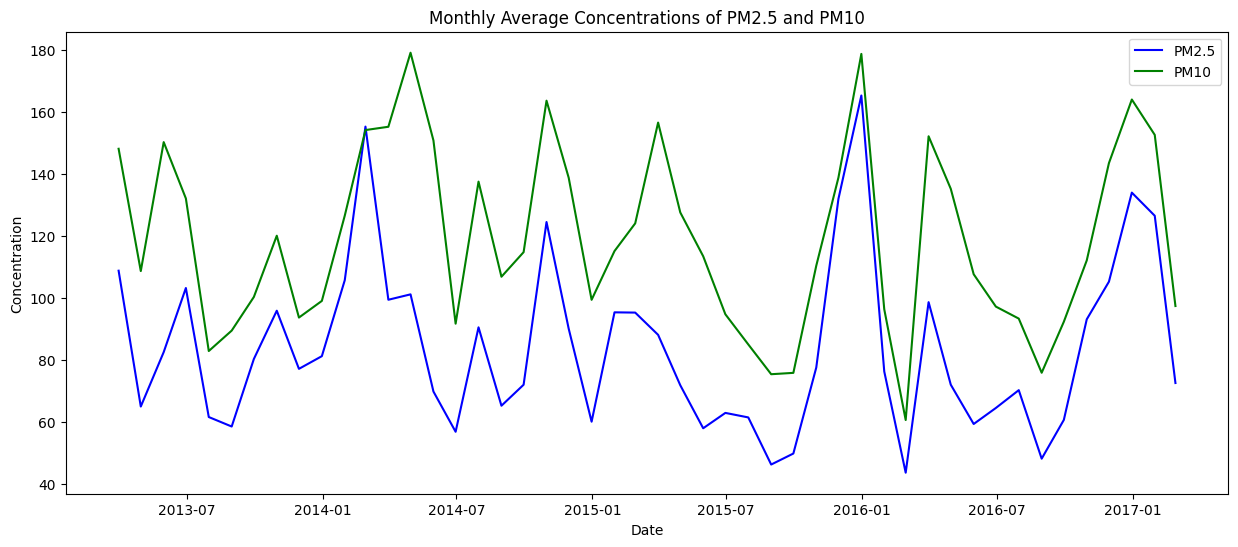

In [102]:
# how do the levels of PM2.5 and PM10 fluctuate throughout the year in Gucheng, China?
# PM2.5 and PM10

# Assuming 'airdata_Gucheng_df' is the DataFrame containing your data
airdata_Gucheng_df['date'] = pd.to_datetime(airdata_Gucheng_df[['year', 'month', 'day', 'hour']])
data_time_series_PM2_5 = airdata_Gucheng_df[['date', 'PM2.5']].set_index('date').resample('M').mean()
data_time_series_PM10 = airdata_Gucheng_df[['date', 'PM10']].set_index('date').resample('M').mean()

plt.figure(figsize=(15, 6))
plt.plot(data_time_series_PM2_5.index, data_time_series_PM2_5['PM2.5'], label='PM2.5', color='blue')
plt.plot(data_time_series_PM10.index, data_time_series_PM10['PM10'], label='PM10', color='green')
plt.title('Monthly Average Concentrations of PM2.5 and PM10')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()


plt.show()

Based on the data depicted in the chart, a robust correlation is evident between PM2.5 and PM10 levels, indicating a closely intertwined relationship between these two pollutants. This correlation suggests that as PM2.5 levels increase, so do PM10 levels, and conversely, a decrease in PM2.5 levels corresponds with a decrease in PM10 levels. 

The visual representation reveals a consistent pattern in which both PM2.5 and PM10 levels exhibit notable increases towards the end and beginning of each year. However, it's worth noting that in the year 2015, the rise in PM2.5 and PM10 levels is not as pronounced compared to other years. This deviation from the overall trend underscores the potential influence of specific environmental or meteorological factors unique to that particular year. Further investigation into the underlying reasons behind this anomaly could provide valuable insights into the dynamics of air pollution fluctuations over time.

### Question 2:
What correlactions occure between PM2.5 and PM10 with SO3, NO2, CO, and O3 in Gucheng, China?

As usual, we can begin by examining the correlation matrix to identify any correlations between PM2.5 and PM10 levels and other variables. Following this, we can visualize the data to enhance our understanding of the observed trends.

In [104]:
correlation_matrix = airdata_Gucheng_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3','TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
correlation_matrix

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.849306,0.414348,0.692964,0.757011,-0.178999,-0.145860,0.022596,0.097060,-0.020184,-0.251702
PM10,0.849306,1.000000,0.379578,0.674167,0.624147,-0.125447,-0.057599,-0.064551,0.094748,-0.032008,-0.190391
SO2,0.414348,0.379578,1.000000,0.469339,0.509732,-0.197559,-0.356522,0.231286,-0.315368,-0.040623,-0.087071
NO2,0.692964,0.674167,0.469339,1.000000,0.704332,-0.505877,-0.258249,0.105436,0.006509,-0.046401,-0.425830
CO,0.757011,0.624147,0.509732,0.704332,1.000000,-0.361000,-0.404132,0.239630,-0.146313,-0.022101,-0.261832
O3,-0.178999,-0.125447,-0.197559,-0.505877,-0.361000,1.000000,0.617816,-0.461926,0.335176,0.023127,0.269587
TEMP,-0.145860,-0.057599,-0.356522,-0.258249,-0.404132,0.617816,1.000000,-0.832454,0.821663,0.035969,-0.046265
PRES,0.022596,-0.064551,0.231286,0.105436,0.239630,-0.461926,-0.832454,1.000000,-0.773286,-0.059145,0.130064
DEWP,0.097060,0.094748,-0.315368,0.006509,-0.146313,0.335176,0.821663,-0.773286,1.000000,0.084479,-0.364296
RAIN,-0.020184,-0.032008,-0.040623,-0.046401,-0.022101,0.023127,0.035969,-0.059145,0.084479,1.000000,0.017300


By correlating the data and visualizing it, we can gain a deeper insight into the relationship between PM2.5 and PM10 levels and their variations throughout the year, helping us better understand the underlying patterns and potential factors influencing air pollution levels.

C:\Users\dprih\AppData\Local\Temp\ipykernel_5232\1597722038.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_time_series = airdata_Gucheng_df[['date', 'PM10', 'PM2.5', 'SO2', 'NO2', 'CO', 'O3']].set_index('date').resample('M').mean()


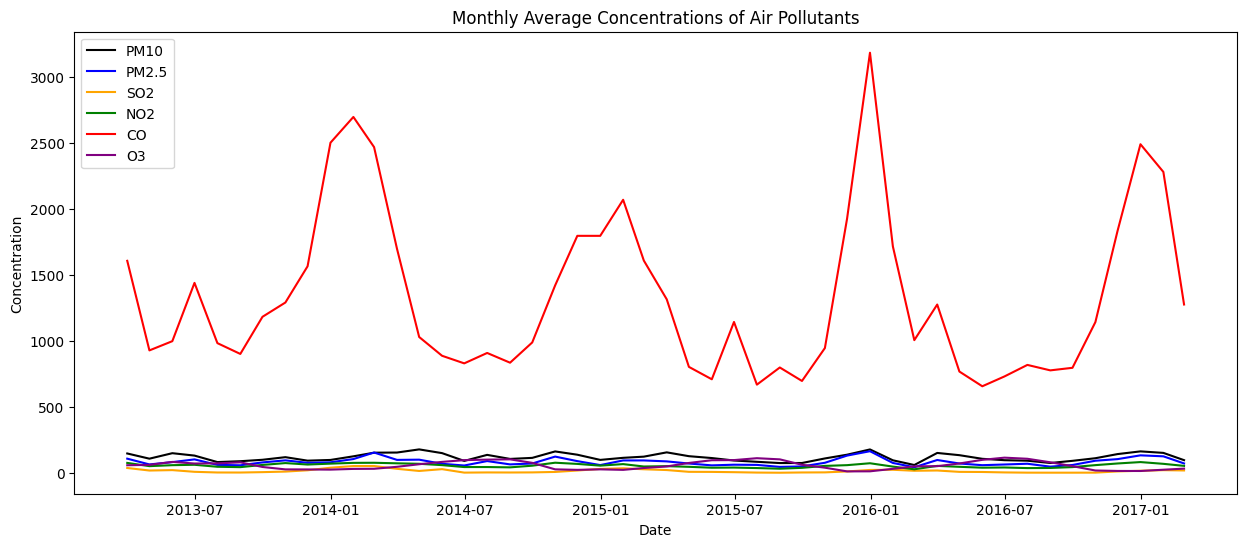

In [105]:
airdata_Gucheng_df['date'] = pd.to_datetime(airdata_Gucheng_df[['year', 'month', 'day', 'hour']])
data_time_series = airdata_Gucheng_df[['date', 'PM10', 'PM2.5', 'SO2', 'NO2', 'CO', 'O3']].set_index('date').resample('M').mean()

plt.figure(figsize=(15, 6))
plt.plot(data_time_series.index, data_time_series['PM10'], label='PM10', color='black')
plt.plot(data_time_series.index, data_time_series['PM2.5'], label='PM2.5', color='blue')
plt.plot(data_time_series.index, data_time_series['SO2'], label='SO2', color='orange')
plt.plot(data_time_series.index, data_time_series['NO2'], label='NO2', color='green')
plt.plot(data_time_series.index, data_time_series['CO'], label='CO', color='red')
plt.plot(data_time_series.index, data_time_series['O3'], label='O3', color='purple')
plt.title('Monthly Average Concentrations of Air Pollutants')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()

To improve the visualization and facilitate easier comparison, we can split the CO data from the other variables. This will allow us to examine the relationships between PM2.5 and PM10 levels and other variables separately, making it easier to identify patterns and correlations. By separating the CO data, we can create side-by-side visualizations that provide a clearer understanding of the relationships between air pollutants and other factors.

C:\Users\dprih\AppData\Local\Temp\ipykernel_5232\3173192341.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_time_series_PM10 = airdata_Gucheng_df[['date', 'PM10']].set_index('date').resample('M').mean()
C:\Users\dprih\AppData\Local\Temp\ipykernel_5232\3173192341.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_time_series_PM2_5 = airdata_Gucheng_df[['date', 'PM2.5']].set_index('date').resample('M').mean()
C:\Users\dprih\AppData\Local\Temp\ipykernel_5232\3173192341.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_time_series_SO2 = airdata_Gucheng_df[['date', 'SO2']].set_index('date').resample('M').mean()
C:\Users\dprih\AppData\Local\Temp\ipykernel_5232\3173192341.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datetime_series_NO2 = airdata_Gu

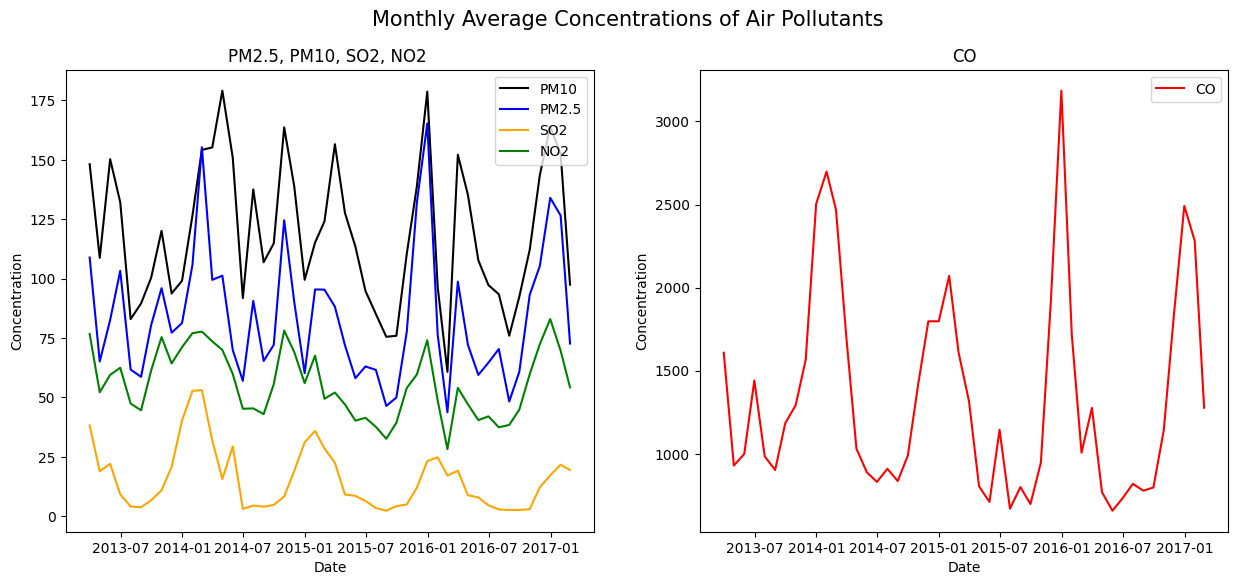

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle('Monthly Average Concentrations of Air Pollutants', fontsize=15)

# PM2.5 and PM10
data_time_series_PM10 = airdata_Gucheng_df[['date', 'PM10']].set_index('date').resample('M').mean()
data_time_series_PM2_5 = airdata_Gucheng_df[['date', 'PM2.5']].set_index('date').resample('M').mean()
date_time_series_SO2 = airdata_Gucheng_df[['date', 'SO2']].set_index('date').resample('M').mean()
datetime_series_NO2 = airdata_Gucheng_df[['date', 'NO2']].set_index('date').resample('M').mean()

axes[0].plot(data_time_series_PM10.index, data_time_series_PM10['PM10'], label='PM10', color='black')
axes[0].plot(data_time_series_PM2_5.index, data_time_series_PM2_5['PM2.5'], label='PM2.5', color='blue')
axes[0].plot(date_time_series_SO2.index, date_time_series_SO2['SO2'], label='SO2', color='orange')
axes[0].plot(datetime_series_NO2.index, datetime_series_NO2['NO2'], label='NO2', color='green')
axes[0].set_title('PM2.5, PM10, SO2, NO2 ')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Concentration')
axes[0].legend()

# CO
data_time_series_CO = airdata_Gucheng_df[['date', 'CO']].set_index('date').resample('M').mean()

axes[1].plot(data_time_series_CO.index, data_time_series_CO['CO'], label='CO', color='red')
axes[1].set_title('CO')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Concentration')
axes[1].legend()

plt.show()

While the correlation matrix doesn't show a significant correlation with O3, it's worth noting that the chart depicts a consistent trend among CO, PM2.5, and PM10 levels. Additionally, NO2 and SO2 exhibit a somewhat parallel pattern in the visualization. This observation sheds light on why CO demonstrates a strong correlation with both PM2.5 and PM10. By visually comparing these variables, we can better understand their interrelationships and the potential factors driving air pollution levels.

This is how it looks if O3 is included in the comparison. The correlation matrix doesn't indicate a significant correlation with O3, hence it's not included in the comparison. However, the chart illustrates a consistent trend among CO, PM2.5, and PM10, with NO2 and SO2 displaying a somewhat parallel pattern. This observation helps clarify why CO demonstrates a strong correlation with both PM2.5 and PM10.

C:\Users\dprih\AppData\Local\Temp\ipykernel_5232\79787866.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_time_series = airdata_Gucheng_df[['date', 'PM10', 'PM2.5', 'SO2', 'NO2', 'CO', 'O3']].set_index('date').resample('M').mean()


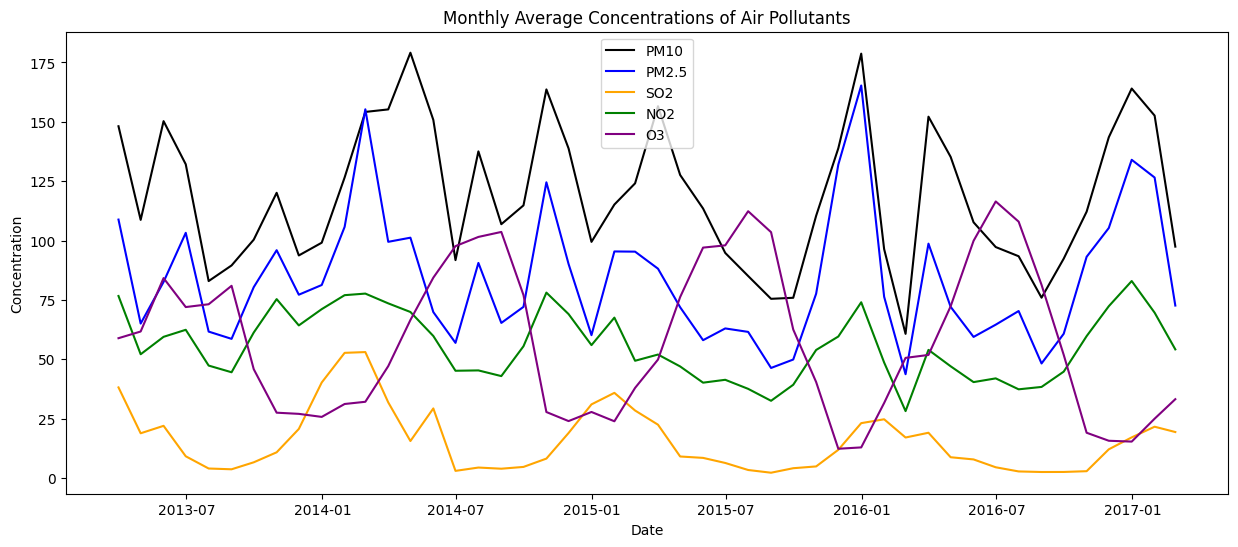

In [107]:
airdata_Gucheng_df['date'] = pd.to_datetime(airdata_Gucheng_df[['year', 'month', 'day', 'hour']])
data_time_series = airdata_Gucheng_df[['date', 'PM10', 'PM2.5', 'SO2', 'NO2', 'CO', 'O3']].set_index('date').resample('M').mean()

plt.figure(figsize=(15, 6))
plt.plot(data_time_series.index, data_time_series['PM10'], label='PM10', color='black')
plt.plot(data_time_series.index, data_time_series['PM2.5'], label='PM2.5', color='blue')
plt.plot(data_time_series.index, data_time_series['SO2'], label='SO2', color='orange')
plt.plot(data_time_series.index, data_time_series['NO2'], label='NO2', color='green')
# plt.plot(data_time_series.index, data_time_series['CO'], label='CO', color='red')
plt.plot(data_time_series.index, data_time_series['O3'], label='O3', color='purple')
plt.title('Monthly Average Concentrations of Air Pollutants')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()

While the correlation matrix might not indicate a significant correlation between PM2.5 and PM10 with O3, it's essential to analyze their relationships in more detail. We can create visualizations specifically focusing on the variations of PM2.5 and PM10 levels alongside O3 levels over time. This detailed comparison will allow us to uncover any potential patterns or correlations that might not be evident from the correlation matrix alone. By exploring these relationships, we can gain a better understanding of how different pollutants interact and contribute to air quality dynamics.

Text(0, 0.5, 'Concentration')

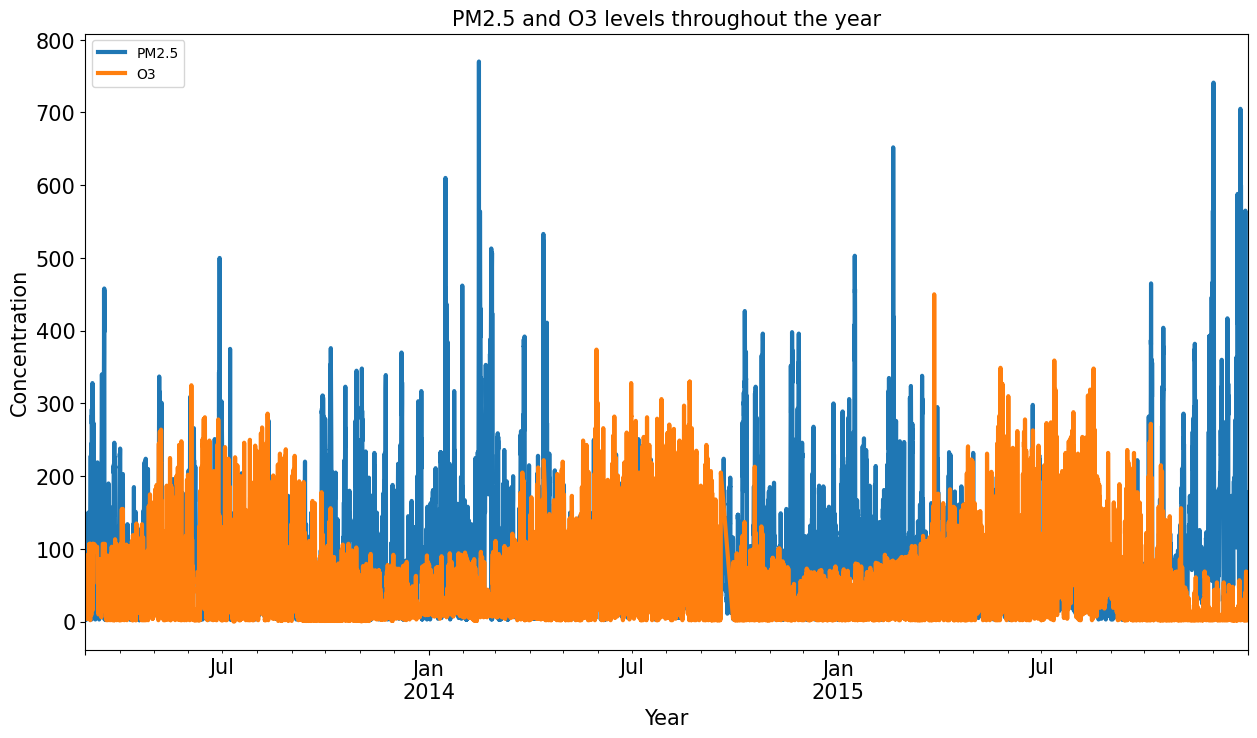

In [112]:
airdata_Gucheng_df["2013":"2015"][['PM2.5','O3']].plot(figsize=(15,8),linewidth= 3,fontsize = 15)
plt.title('PM2.5 and O3 levels throughout the year', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Concentration', fontsize = 15)


The chart illustrates that PM2.5 levels are predominantly high during winter months, whereas O3 levels peak during summer months. This seasonal variation in occurrence explains why O3 doesn't exhibit a significant correlation with PM2.5. The contrasting patterns between PM2.5 and O3 underscore their distinct sources and behaviors, with PM2.5 being more influenced by wintertime emissions and O3 by summertime photochemical reactions. This detailed observation helps elucidate the lack of a strong correlation between PM2.5 and O3 in the dataset.

Let's test it now with PM10.

Text(0, 0.5, 'Concentration')

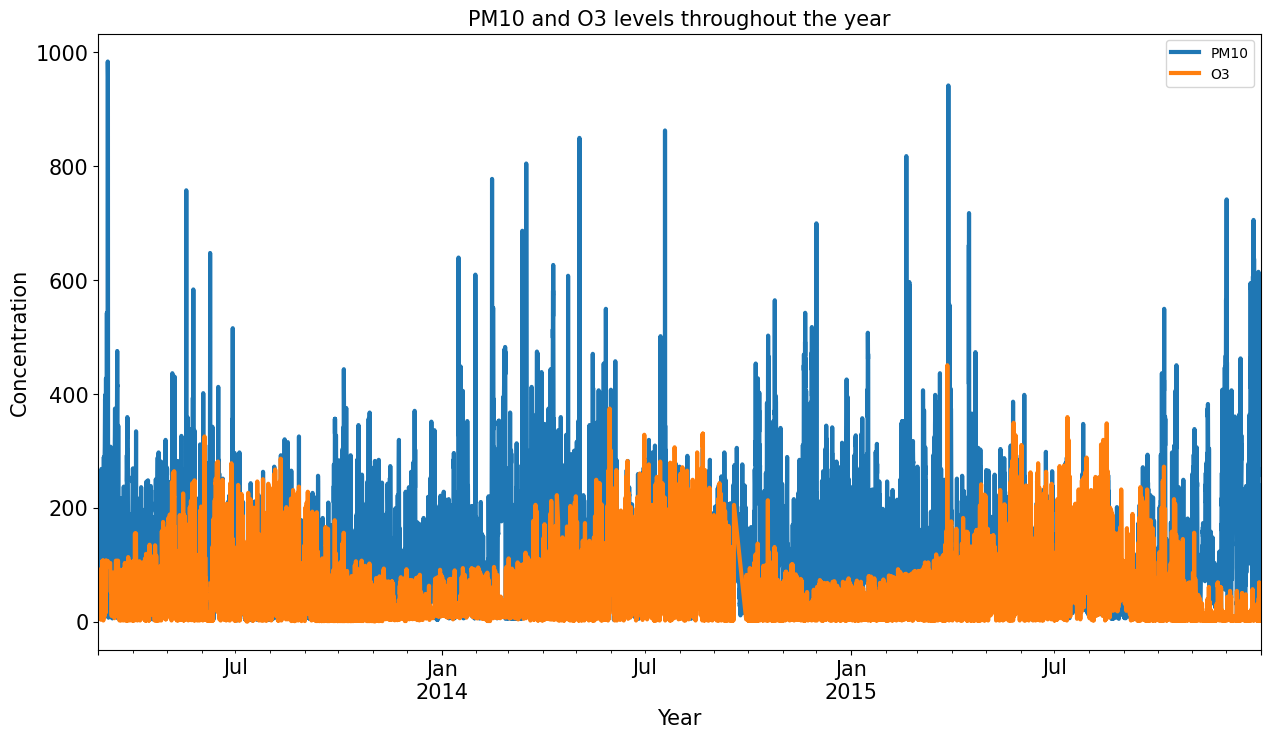

In [113]:
airdata_Gucheng_df["2013":"2015"][['PM10','O3']].plot(figsize=(15,8),linewidth= 3,fontsize = 15)
plt.title('PM10 and O3 levels throughout the year', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Concentration', fontsize = 15)

Indeed, PM10 exhibits a similar seasonal pattern to PM2.5, with both pollutants showing higher levels during winter months. As for O3, its occurrence peaks mainly during summer. This discrepancy in seasonal trends explains why O3 doesn't demonstrate a significant correlation with PM10. The contrasting patterns between PM10 and O3, driven by different sources and atmospheric conditions, contribute to the lack of a strong correlation between these pollutants in the dataset.

### Question 3:
What correlations exist between the levels of PM2.5 the variables of TEMP and PRES in Gucheng, China?

Certainly, let's proceed with analyzing the correlation between PM2.5 levels and temperature (TEMP) as well as atmospheric pressure (PRES) using a correlation matrix. Following this, visualizitaon of the data is needed to gain a deeper understanding of the observed trends and relationships between PM2.5 levels and these atmospheric variables. This approach will help elucidate any potential correlations and provide insights into the impact of temperature and pressure on PM2.5 levels.

In [114]:
correlation_matrix = airdata_Gucheng_df[['PM2.5','TEMP', 'PRES']].corr()
correlation_matrix

,PM2.5,TEMP,PRES
PM2.5,1.000000,-0.145860,0.022596
TEMP,-0.145860,1.000000,-0.832454
PRES,0.022596,-0.832454,1.000000


C:\Users\dprih\AppData\Local\Temp\ipykernel_5232\103692661.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_time_series = airdata_Gucheng_df[['date', 'PM2.5', 'TEMP', 'PRES']].set_index('date').resample('M').mean()


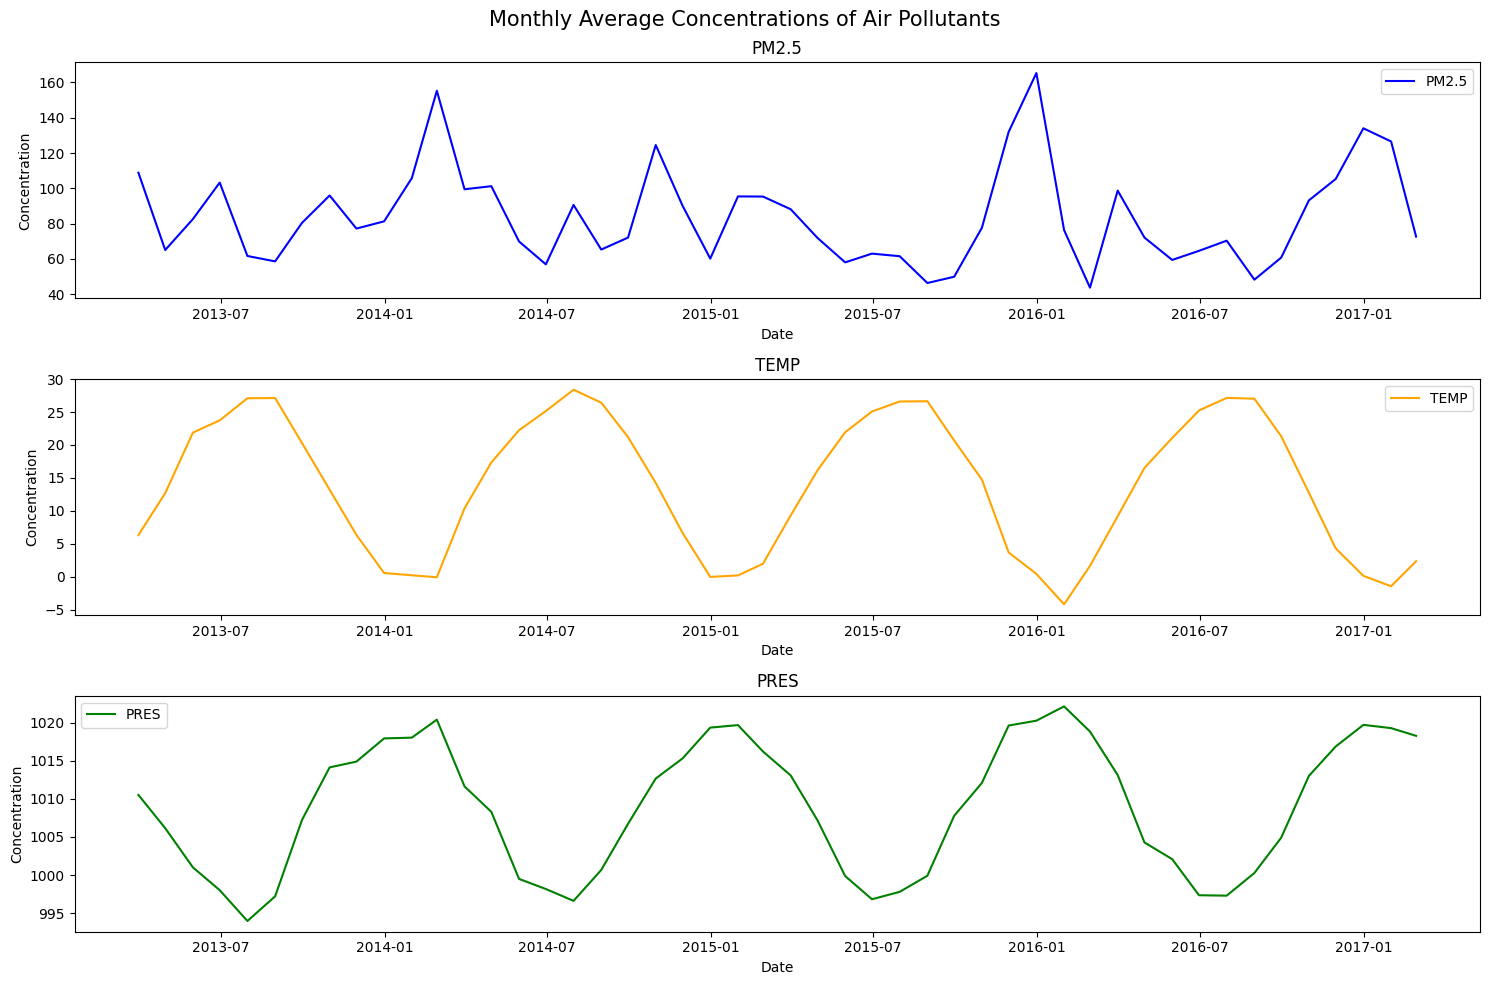

In [118]:
airdata_Gucheng_df['date'] = pd.to_datetime(airdata_Gucheng_df[['year', 'month', 'day', 'hour']])
data_time_series = airdata_Gucheng_df[['date', 'PM2.5', 'TEMP', 'PRES']].set_index('date').resample('M').mean()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
fig.suptitle('Monthly Average Concentrations of Air Pollutants', fontsize=15)

# PM2.5 
axes[0].plot(data_time_series.index, data_time_series['PM2.5'], label='PM2.5', color='blue')
axes[0].set_title('PM2.5')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Concentration')
axes[0].legend()

#TEMP
axes[1].plot(data_time_series.index, data_time_series['TEMP'], label='TEMP', color='orange')
axes[1].set_title('Temperature')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Concentration')
axes[1].legend()

# PRES
axes[2].plot(data_time_series.index, data_time_series['PRES'], label='PRES', color='green')
axes[2].set_title('Pressure')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Concentration')
axes[2].legend()

plt.tight_layout()
plt.show()

From the charts provided, it appears that temperature exhibits an inverse correlation with both PM2.5 levels and atmospheric pressure. To delve deeper into this relationship, let's group the data by month and analyze the concentration of PM2.5 levels, temperature, and pressure for each month individually. This detailed analysis will allow us to better understand the variations in air pollutant levels in relation to temperature and pressure fluctuations throughout the year.

In [117]:
airdata_Gucheng_df["2013":"2017"][["month","PM2.5","TEMP","PRES","DEWP"]].groupby('month').agg({'PM2.5':['min','max'], 'TEMP':['min','max'],'PRES':['min','max']})

PM2.5         TEMP          PRES        
        min    max   min   max     min     max
month                                         
1       3.0  767.0 -15.6  12.6  1002.0  1038.1
2       3.0  770.0 -10.6  15.5   998.3  1032.1
3       3.0  458.0  -4.9  26.2   989.9  1030.0
4       2.0  533.0  -0.1  31.8   986.7  1026.6
5       3.0  337.0   6.2  41.6   984.0  1015.2
6       2.0  500.0  14.7  37.5   986.8  1007.6
7       3.0  375.0  17.4  39.3   984.0  1006.6
8       3.0  276.0  15.1  36.3   986.5  1011.0
9       3.0  311.0   7.7  33.9   986.9  1023.4
10      3.0  465.0  -1.3  28.2   998.9  1032.4
11      3.0  546.0  -9.3  21.5   998.0  1034.3
12      3.0  741.0  -9.3  15.4  1000.0  1032.3

Based on the information gleaned from the charts and tables, it's clear that there exists a negative correlation between temperature and pressure. This relationship indicates that as temperature rises, pressure tends to decrease, and conversely, as temperature falls, pressure tends to increase.

Conversely, a positive correlation is evident between PM2.5 levels and pressure, as depicted in the chart. This implies that higher pressure conditions correspond to elevated PM2.5 levels. These observations offer valuable insights into the intricate interactions between atmospheric variables and air pollutant levels, underscoring the multifaceted dynamics that shape air quality.

## Conclusion

- Conclusion for 1st Question

   1. **Correlation between PM2.5 and PM10 levels**: The data shows a robust correlation between PM2.5 and PM10 levels, indicating a closely intertwined relationship between these two pollutants. As PM2.5 levels increase, so do PM10 levels, and conversely, a decrease in PM2.5 levels corresponds with a decrease in PM10 levels.

   2. **Consistent seasonal pattern**: The visual representation of the data reveals a consistent pattern where both PM2.5 and PM10 levels exhibit notable increases towards the end and beginning of each year. This suggests the presence of seasonal influences or environmental factors that lead to fluctuations in air pollution levels over time.

   3. **Deviation in 2015**: However, in the year 2015, the rise in PM2.5 and PM10 levels is not as pronounced compared to other years. This deviation from the overall trend indicates the potential influence of specific environmental or meteorological factors unique to that particular year. Further investigation into the underlying reasons behind this anomaly could provide valuable insights into the dynamics of air pollution fluctuations over time.

   In conclusion, the data analysis highlights the correlation between PM2.5 and PM10 levels, the consistent seasonal pattern in air pollution levels, and the anomaly observed in 2015. These insights underscore the complexity of air pollution dynamics and the importance of continuous monitoring and analysis to understand and address environmental challenges effectively.


- Conclusion for 2nd Question

   1. **Correlation among pollutants**:
      - The correlation matrix doesn't show a significant correlation with O3.
      - CO exhibits a strong correlation with both PM2.5 and PM10, reflecting their interrelationships.
      - NO2 and SO2 display a somewhat parallel pattern, contributing to the correlation with CO, PM2.5, and PM10.

   2. **Seasonal variation**:
      - PM2.5 levels are consistently high during winter months, whereas O3 levels peak during summer months.
      - PM10 also shows higher levels during winter, while O3 peaks mainly in summer.
      - The contrasting seasonal patterns between PM2.5 and O3, as well as PM10 and O3, highlight distinct sources and behaviors driven by wintertime emissions and summertime photochemical reactions.

   3. **Lack of strong correlation with O3**:
      - The contrasting seasonal patterns between PM2.5 and O3, and PM10 and O3, contribute to the lack of a significant correlation between these pollutants.
      - This discrepancy emphasizes the importance of considering seasonal variations and distinct sources when analyzing correlations among air pollutants.

   In summary, the analysis elucidates the complex interrelationships and seasonal variations among air pollutants, highlighting the distinct behaviors of PM2.5, PM10, and O3. These insights underscore the need for comprehensive analyses that consider both correlation matrices and visual representations to better understand air pollution dynamics and their driving factors.

- Conclusion for 3rd Question

   1. **Inverse correlation between temperature and PM2.5 levels/atmospheric pressure**:
      - The charts suggest an inverse correlation between temperature and both PM2.5 levels and atmospheric pressure. As temperature increases, PM2.5 levels and atmospheric pressure tend to decrease, and vice versa.

   2. **Analysis by month**:
      - Further analysis is proposed by grouping the data by month to understand the variations in PM2.5 levels, temperature, and pressure on a monthly basis. This approach allows for a more detailed examination of how these variables fluctuate throughout the year.

   3. **Negative correlation between temperature and pressure**:
      - A negative correlation between temperature and pressure. As temperature rises, pressure tends to decrease, and as temperature falls, pressure tends to increase. This relationship is important for understanding atmospheric dynamics.

   4. **Positive correlation between PM2.5 levels and pressure**:
      - In contrast to the inverse correlation with temperature, there is a positive correlation between PM2.5 levels and pressure. Higher pressure conditions correspond to elevated PM2.5 levels. This suggests that atmospheric pressure may influence the concentration of PM2.5 pollutants.

   5. **Insights into atmospheric interactions and air quality dynamics**:
      - These observations provide valuable insights into the complex interactions between atmospheric variables and air pollutant levels. Understanding these relationships is crucial for comprehensively assessing air quality and identifying potential factors contributing to pollution levels.

   In conclusion, the text highlights the inverse correlation between temperature and both PM2.5 levels and atmospheric pressure, as well as the negative correlation between temperature and pressure. Additionally, a positive correlation is noted between PM2.5 levels and pressure. These findings underscore the importance of considering multiple environmental factors when analyzing air quality dynamics.

In [122]:
print("pandas ==", pd.__version__)
print("numpy ==", np.__version__)
print("matplotlib ==", plt.matplotlib.__version__)
print("seaborn ==", sns.__version__)

pandas == 2.2.1
numpy == 1.26.4
matplotlib == 3.8.3
seaborn == 0.13.2
